## Environment and Data

In [ ]:
%cd /content
# clone MARC repo
!git clone --recursive https://github.com/ekinakyurek/marc.git
# !unzip marc-main.zip

/content
Cloning into 'marc'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 182 (delta 35), reused 29 (delta 29), pack-reused 138 (from 1)
Receiving objects: 100% (182/182), 78.33 KiB | 19.58 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Submodule 'third_party/torchtune' (https://github.com/ekinakyurek/torchtune.git) registered for path 'third_party/torchtune'
Cloning into '/content/marc/third_party/torchtune'...
remote: Enumerating objects: 11982, done.        
remote: Total 11982 (delta 0), reused 0 (delta 0), pack-reused 11982 (from 1)        
Receiving objects: 100% (11982/11982), 8.10 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (9090/9090), done.
Submodule path 'third_party/torchtune': checked out 'efd85e000e83dcf6803c623cf83943e4a817377a'


In [ ]:
# clone BARC repo
!git clone https://github.com/xu3kev/BARC.git

Cloning into 'BARC'...
remote: Enumerating objects: 4395, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 4395 (delta 224), reused 213 (delta 200), pack-reused 4120 (from 2)
Receiving objects: 100% (4395/4395), 17.40 MiB | 19.47 MiB/s, done.
Resolving deltas: 100% (2495/2495), done.


Click to Restart and Rerun from below cell (3 minutes in L4 and A100)

In [ ]:
%cd /content/marc/
!pwd
# For TTT pipeline, we used a fork of torchtune library.
# You need to install it first
!conda create -n arc python=3.10
!conda activate arc
# Install torchtune with my specific fork
# We need this as editable because we actually use some files
# under third_party/torchtune/recipes/ which doesn't come
# if you just do pip install
%cd third_party/torchtune
!pip install -e .
# install other required libraries for torchtune
!pip install torch torchao --pre --upgrade --index-url https://download.pytorch.org/whl/nightly/cu121
!ls -alh
# Then we have simple requirements can be installed as:
## File does not exist
%cd /content/marc/
!pip install -r requirements.txt

/content/marc
/content/marc
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/content/marc/third_party/torchtune
Obtaining file:///content/marc/third_party/torchtune
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for torchtune (pyproject.toml) ... done
  Created wheel for torchtune: filename=torchtune-0.0.0-0.editable-py3-none-any.whl size=10788 sha256=276aa4557e4c8a0f8c7e67a021ec0c52678efcba0d478459ca1c0899a6cb3ce3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ws6wixrh/wheels/04/ef/30/80a5394ecf9e1f4cccd46fa44261afa509a2bee37eeb2e6884
Successfully built torchtune
  Attempting uninstall: torchtune
    Found existing installation: torchtune 0.0.0
    Uninstalling torchtune-0.0.0:
      Successfully uninstalled torchtune-0.0.0
Looking in indexes: https://download.pyto

Load your drive content for the purpose of loading updated script and saving results

In [ ]:
%cd /content
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [ ]:
from google.colab import userdata
import os
# For running openai gpt models
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
# Login for hugging face (For load models and lora adapaters)
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

#### Load data

##### load BARC prompts

In [ ]:
%cd /content/BARC/finetune/alignment-handbook

/content/BARC/finetune/alignment-handbook


In [ ]:
import json
problem_file = "./arc_problems_validation_400_extra_newline_v2.jsonl"
prompt_data = []
with open(problem_file) as f:
    for line in f:
        prompt_data.append(json.loads(line))

In [ ]:
from tqdm import tqdm
for d in tqdm(prompt_data):
    messages = d["messages"]
    assert messages[1]["role"] == "user"
    user_messages = messages[1]["content"]

100%|██████████| 400/400 [00:00<00:00, 1039480.55it/s]


In [ ]:
d

{'uid': '845d6e51',
 'messages': [{'role': 'system',
   'content': 'You are a world-class puzzle solver with exceptional pattern recognition skills and expertise in Python programming. Your task is to analyze puzzles and provide Python solutions.'},
  {'role': 'user',
   'content': 'Given input-output grid pairs as reference examples, carefully observe the patterns to predict the output grid for new test input. Each pair follows the same transformation rule. Grids are 2D arrays represented as strings, with cells (colors) separated by spaces and rows by newlines.\nHere are the input and output grids for the reference examples:\nExample 1\nInput:\nBlack Red Black Black Blue Blue Black Gray Black Black Black Black Black Black Black Black\nRed Red Red Black Blue Black Black Gray Black Black Green Green Green Black Black Black\nBlack Black Black Black Black Black Black Gray Black Black Black Green Black Black Black Black\nGray Gray Gray Gray Gray Gray Gray Gray Black Black Black Black Black

In [ ]:
for i in tqdm(range(20*60)):
  time.sleep(1)

100%|██████████| 1200/1200 [20:01<00:00,  1.00s/it]


In [ ]:
%cd /content/marc

/content/marc


##### Option 1: Copy from drive

In [ ]:
!cp -r /content/drive/MyDrive/MARC/Data /content/data/

##### Option 2: Load from kaggle competition
- Run next cell to put put kaggle.json to the kaggle folder in /root/.config/kaggle and rerun

In [ ]:
# See: https://www.kaggle.com/discussions/general/74235
# for instructions

from kaggle.api.kaggle_api_extended import KaggleApi

# Login for kaggle
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

# Perform kaggel login and download data/
api = KaggleApi()
api.authenticate()
api.competitions_list()
api.competition_download_cli(competition="arc-prize-2024",  path='/content')
# !kaggle competitions download -c arc-prize-2024

100%|██████████| 314k/314k [00:00<00:00, 491kB/s]

In [ ]:
# Put put kaggle.json to the kaggle folder in /root/.config/kaggle
!cp -r /content/drive/MyDrive/MARC/kaggle.json /root/.config/kaggle

In [ ]:
!mkdir /content/data/

# If you rerun this cell this may hang asking you to confirm
!unzip /content/arc-prize-2024.zip -d /content/data/
!rm -r /content/arc-prize-2024.zip

!mkdir /content/checkpoints
!mkdir /content/ttt
!mkdir /content/tti
#cange path the the model path that we are useing
!for F in /content/marc/configs/ttt/*; do sed -i 's/path: checkpoints\/base\/\(.*\)\/original\/tokenizer\.model/path: \/content\/checkpoints\/\1\/original\/tokenizer.model/g' $F ;  done


Archive:  /content/arc-prize-2024.zip
  inflating: /content/data/arc-agi_evaluation_challenges.json  
  inflating: /content/data/arc-agi_evaluation_solutions.json  
  inflating: /content/data/arc-agi_test_challenges.json  
  inflating: /content/data/arc-agi_training_challenges.json  
  inflating: /content/data/arc-agi_training_solutions.json  
  inflating: /content/data/sample_submission.json  


## Prediction

#### [show time template]

In [ ]:
# prompt: calculate total time in seconds

import time

start_time = time.time()
print("Start Time:", start_time)

# ... your code execution ...

end_time = time.time()
print("End Time:", end_time)
print("Total Time:", end_time - start_time)

Start Time: 1737520161.215082
End Time: 1737520161.215653
Total Time: 0.0005710124969482422


### VLLM (prepare for with engine prediction)

In [ ]:
# For Llama3 and 3.1 models (About 29 mins)
# !conda create -n vllm python=3.10
# !conda activate vllm
start_time = time.time() # start time
print("Start Time:", start_time)

!pip install vllm@git+https://github.com/ekinakyurek/vllm.git@ekin/torchtunecompat

end_time = time.time() # end time
print("End Time:", end_time)
print("Total Time:", end_time - start_time) # total time

Start Time: 1737520162.9106562
  Cloning https://github.com/ekinakyurek/vllm.git (to revision ekin/torchtunecompat) to /tmp/pip-install-_7r9fydf/vllm_e11862b4809542d3929297ef45c29100
  Running command git clone --filter=blob:none --quiet https://github.com/ekinakyurek/vllm.git /tmp/pip-install-_7r9fydf/vllm_e11862b4809542d3929297ef45c29100
  Running command git checkout -b ekin/torchtunecompat --track origin/ekin/torchtunecompat
  Switched to a new branch 'ekin/torchtunecompat'
  Branch 'ekin/torchtunecompat' set up to track remote branch 'ekin/torchtunecompat' from 'origin'.
  Resolved https://github.com/ekinakyurek/vllm.git to commit aa998fe5e3c46550e4ddbdc74ae2b887b5b09cd7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ninja-1.11.1.3-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.3 kB)
  Using cached torch-2.4.0-cp311-cp311-manylinux1_x86_64.whl.metadata (26 kB

In [ ]:
!pip install -r requirements.txt

[Errno 2] No such file or directory: 'marc'
/content/marc


### For fine-tuned model

In [ ]:
from huggingface_hub import snapshot_download #(2-3 minutes)
#%cd /content/drive/MyDrive/Colab\ Notebooks/Untitled/checkpoint/
# This is massive, you will need colab pro...
snapshot_download(repo_id="barc0/Llama-3.1-ARC-Potpourri-Transduction-8B",
                  local_dir="/content/checkpoints/Llama-3.1-ARC-Potpourri-Transduction-8B-BARC")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

all_results.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

eval_results.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

(…)t.tfevents.1730035682.7bcc0bab7cf9.660.1:   0%|          | 0.00/359 [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

(…)t.tfevents.1729967814.7bcc0bab7cf9.660.0:   0%|          | 0.00/2.37M [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

train_results.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

trainer_state.json:   0%|          | 0.00/1.95M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

'/content/checkpoints/Llama-3.1-ARC-Potpourri-Transduction-8B-BARC'

In [ ]:
# ARC data stored in each json file
# !git clone https://github.com/fchollet/ARC-AGI.git

Cloning into 'ARC-AGI'...
remote: Enumerating objects: 1274, done.
remote: Counting objects: 100% (282/282), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 1274 (delta 193), reused 175 (delta 175), pack-reused 992 (from 2)
Receiving objects: 100% (1274/1274), 498.68 KiB | 19.95 MiB/s, done.
Resolving deltas: 100% (726/726), done.


#### Load o3 unsolved puzzles

In [ ]:
# load the result.json
import json
with open('/content/drive/MyDrive/MARC/argprizeorg_results/results/open_ai_o3_high_20241220/results.json', 'r') as f:
    org_results_high = json.load(f)
with open('/content/drive/MyDrive/MARC/argprizeorg_results/results/open_ai_o3_low_20241220/results.json', 'r') as f:
    org_results_low = json.load(f)

In [ ]:
org_results_high.keys(), org_results_low.keys()

(dict_keys(['score', 'total_tasks', 'task_results']),
 dict_keys(['score', 'total_tasks', 'task_results']))

In [ ]:
list(org_results_high["task_results"].keys())[:5], list(org_results_low["task_results"].keys())[:5]

(['f0afb749', '94414823', 'dc2e9a9d', 'f83cb3f6', 'baf41dbf'],
 ['f0afb749', '94414823', 'dc2e9a9d', 'f83cb3f6', 'baf41dbf'])

In [ ]:
high_unsolved_taskids = [key for key, value in org_results_high["task_results"].items() if value == 0]
print(high_unsolved_taskids)

['da515329', 'f9d67f8b', '891232d6', '52fd389e', 'c6e1b8da', '09c534e7', 'ac0c5833', '47996f11', 'b457fec5', 'b7999b51', 'b9630600', '896d5239', '40f6cd08', '8b28cd80', '93c31fbe', '25094a63', '05a7bcf2', '0934a4d8', '79fb03f4', '4b6b68e5', 'aa4ec2a5', '1acc24af', 'f3b10344', '256b0a75', 'd931c21c', '16b78196', 'a3f84088', '212895b5', '0d87d2a6', '3ed85e70', 'e619ca6e', 'e1d2900e', 'd94c3b52', 'e681b708']


In [ ]:
# prompt: save high_unsolved_taskids as csv file

import pandas as pd

# Assuming high_unsolved_taskids is defined as in the provided code
# Create a DataFrame
df = pd.DataFrame({'task_id': high_unsolved_taskids})
df = df.reset_index()

# Save to CSV
df.to_csv('/content/drive/MyDrive/MARC/high_unsolved_taskids.csv', index=False)

In [ ]:
low_unsolved_taskids = [key for key, value in org_results_low["task_results"].items() if value == 0]
print(low_unsolved_taskids)

['dc2e9a9d', '50f325b5', 'da515329', '14754a24', 'f9d67f8b', '891232d6', '52fd389e', 'c6e1b8da', '09c534e7', 'ac0c5833', 'ce039d91', '929ab4e9', '477d2879', '47996f11', 'fea12743', '64a7c07e', '7d419a02', 'b457fec5', 'b7999b51', 'b9630600', 'a04b2602', '896d5239', 'b942fd60', 'a8610ef7', '97239e3d', 'a096bf4d', '40f6cd08', '551d5bf1', 'f9a67cb5', '3391f8c0', '42918530', 'bf32578f', '8b28cd80', '93c31fbe', '1c56ad9f', 'af22c60d', '25094a63', '05a7bcf2', '8cb8642d', '0934a4d8', '79fb03f4', 'd017b73f', 'fd096ab6', '5b692c0f', '4b6b68e5', 'aa4ec2a5', '1acc24af', 'f3b10344', '08573cc6', '0a2355a6', '256b0a75', 'd931c21c', '58e15b12', 'b0f4d537', '16b78196', '136b0064', '981571dc', 'a3f84088', '212895b5', '0d87d2a6', '3ed85e70', '692cd3b6', 'e619ca6e', 'e1d2900e', '2c0b0aff', 'd94c3b52', '73ccf9c2', '9caba7c3', '8fbca751']


In [ ]:
# find the difference between high_unsolved_taskids and low_unsolved_taskids
high_diff_low_taskids = list(set(high_unsolved_taskids) - set(low_unsolved_taskids))
low_diff_high_taskids = list(set(low_unsolved_taskids) - set(high_unsolved_taskids))
print(high_diff_low_taskids)
print(low_diff_high_taskids)

['e681b708']
['a04b2602', 'dc2e9a9d', '14754a24', '97239e3d', 'd017b73f', '5b692c0f', 'b0f4d537', 'a096bf4d', '64a7c07e', 'a8610ef7', '2c0b0aff', '3391f8c0', 'ce039d91', '0a2355a6', '73ccf9c2', '1c56ad9f', '58e15b12', '929ab4e9', '9caba7c3', '8fbca751', '692cd3b6', 'fd096ab6', '477d2879', '8cb8642d', 'af22c60d', '42918530', 'f9a67cb5', '08573cc6', 'bf32578f', '981571dc', '136b0064', '50f325b5', '7d419a02', '551d5bf1', 'fea12743', 'b942fd60']


In [ ]:
high_unsolved_taskids_pattern = []
for each in high_unsolved_taskids:
  high_unsolved_taskids_pattern.append(f"{each}/*")
high_unsolved_taskids_pattern[:5]

['da515329/*', 'f9d67f8b/*', '891232d6/*', '52fd389e/*', 'c6e1b8da/*']

### Load LoRA adapter

In [ ]:
# Load LoRA (Example)
from huggingface_hub import snapshot_download
import time
record_download_time_list = {}
for each in high_unsolved_taskids_pattern:
  start_time = time.time()
  print("Start Time:", start_time)

  # ... your code execution ...
  snapshot_download(repo_id="ekinakyurek/marc-lora-adapters-Llama-3.1-ARC-Potpourri-Transduction-8B",
                    local_dir="/content/barc/marc-lora-adapters-Llama-3.1-ARC-Potpourri-Transduction-8B",
                    allow_patterns=each)


  end_time = time.time()
  print("End Time:", end_time)
  print("Total Time:", end_time - start_time)
  record_download_time_list[each] = end_time - start_time

Start Time: 1737522935.8119063


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

da515329/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

da515329/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

da515329/log_1731002757.txt:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737522963.4536648
Total Time: 27.64175844192505
Start Time: 1737522963.454947


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

f9d67f8b/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

f9d67f8b/log_1730995480.txt:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

f9d67f8b/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/8.71M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737522989.507064
Total Time: 26.052117109298706
Start Time: 1737522989.507203


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

891232d6/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

891232d6/log_1730777676.txt:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

891232d6/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/5.13M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523015.4260402
Total Time: 25.918837070465088
Start Time: 1737523015.427772


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/24.0k [00:00<?, ?B/s]

52fd389e/log_1731008884.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

52fd389e/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

52fd389e/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523041.067055
Total Time: 25.639282941818237
Start Time: 1737523041.0672765


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

c6e1b8da/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

c6e1b8da/log_1731006177.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

c6e1b8da/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.75M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523066.586267
Total Time: 25.518990516662598
Start Time: 1737523066.5865273


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

09c534e7/log_1730995880.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

09c534e7/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

09c534e7/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523092.3171082
Total Time: 25.730580806732178
Start Time: 1737523092.3174555


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

ac0c5833/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

ac0c5833/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/27.6k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

ac0c5833/log_1731011063.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523118.087989
Total Time: 25.770533561706543
Start Time: 1737523118.0881321


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

47996f11/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

47996f11/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

47996f11/log_1730771389.txt:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/8.89M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523144.015174
Total Time: 25.92704176902771
Start Time: 1737523144.0161939


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

b457fec5/log_1731009493.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

b457fec5/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

b457fec5/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/13.0k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.48M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523170.1176095
Total Time: 26.101415634155273
Start Time: 1737523170.1198297


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

b7999b51/log_1731009272.txt:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

b7999b51/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

b7999b51/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523195.4560533
Total Time: 25.336223602294922
Start Time: 1737523195.4561467


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

b9630600/log_1731008277.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

b9630600/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

b9630600/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/3.79M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523220.9741764
Total Time: 25.51802968978882
Start Time: 1737523220.9748812


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

896d5239/log_1731016594.txt:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

896d5239/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

896d5239/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.26M [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523246.307521
Total Time: 25.332639932632446
Start Time: 1737523246.309054


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

40f6cd08/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

40f6cd08/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

40f6cd08/log_1730770662.txt:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/3.63M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523282.5071487
Total Time: 36.198094844818115
Start Time: 1737523282.5076022


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

8b28cd80/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

8b28cd80/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

8b28cd80/log_1730778301.txt:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.88M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

End Time: 1737523310.2147236
Total Time: 27.7071213722229
Start Time: 1737523310.2148933


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/19.0k [00:00<?, ?B/s]

93c31fbe/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

93c31fbe/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.17M [00:00<?, ?B/s]

93c31fbe/log_1730778739.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523337.6865335
Total Time: 27.47164011001587
Start Time: 1737523337.686667


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

25094a63/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

25094a63/log_1731001611.txt:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

25094a63/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523363.0559137
Total Time: 25.3692467212677
Start Time: 1737523363.0560207


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

05a7bcf2/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

05a7bcf2/log_1730995133.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

05a7bcf2/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523388.924708
Total Time: 25.86868715286255
Start Time: 1737523388.9274144


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

0934a4d8/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

0934a4d8/log_1730995615.txt:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

0934a4d8/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/4.63M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523416.2190378
Total Time: 27.29162335395813
Start Time: 1737523416.2212145


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

79fb03f4/log_1730776742.txt:   0%|          | 0.00/26.6k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.61M [00:00<?, ?B/s]

79fb03f4/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

79fb03f4/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523442.2435033
Total Time: 26.02228879928589
Start Time: 1737523442.2436268


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

4b6b68e5/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

4b6b68e5/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

4b6b68e5/log_1730772488.txt:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.49M [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523482.1200032
Total Time: 39.87637639045715
Start Time: 1737523482.121546


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

aa4ec2a5/log_1731011396.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

aa4ec2a5/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

aa4ec2a5/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523509.402182
Total Time: 27.280636072158813
Start Time: 1737523509.4035192


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

1acc24af/log_1730767230.txt:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

1acc24af/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

1acc24af/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/4.03M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523534.897231
Total Time: 25.493711948394775
Start Time: 1737523534.8973482


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

f3b10344/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

f3b10344/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/3.57M [00:00<?, ?B/s]

f3b10344/log_1730997266.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523561.8352714
Total Time: 26.937923192977905
Start Time: 1737523561.8365278


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

256b0a75/log_1731001720.txt:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

256b0a75/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

256b0a75/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523587.7926197
Total Time: 25.95609188079834
Start Time: 1737523587.792824


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

d931c21c/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

d931c21c/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

d931c21c/log_1731003101.txt:   0%|          | 0.00/26.5k [00:00<?, ?B/s]

End Time: 1737523615.352199
Total Time: 27.559375047683716
Start Time: 1737523615.3539605


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

16b78196/log_1730766509.txt:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

16b78196/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

16b78196/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523641.074773
Total Time: 25.720812559127808
Start Time: 1737523641.0769658


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

a3f84088/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

a3f84088/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/11.7k [00:00<?, ?B/s]

a3f84088/log_1731012537.txt:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.97M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523668.5614905
Total Time: 27.484524726867676
Start Time: 1737523668.562373


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

212895b5/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

212895b5/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

212895b5/log_1731001273.txt:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523693.8658369
Total Time: 25.30346393585205
Start Time: 1737523693.8681192


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

0d87d2a6/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

0d87d2a6/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

0d87d2a6/log_1730996922.txt:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523719.6475687
Total Time: 25.779449462890625
Start Time: 1737523719.6476967


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

3ed85e70/log_1730770205.txt:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

3ed85e70/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

3ed85e70/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523746.2761307
Total Time: 26.6284339427948
Start Time: 1737523746.2764785


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

e619ca6e/log_1731000574.txt:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

e619ca6e/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

e619ca6e/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/3.08M [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523771.7522068
Total Time: 25.475728273391724
Start Time: 1737523771.7523172


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

e1d2900e/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

e1d2900e/log_1730784050.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

e1d2900e/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.75M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523797.1089175
Total Time: 25.356600284576416
Start Time: 1737523797.1102343


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

d94c3b52/log_1731002992.txt:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

d94c3b52/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

d94c3b52/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523822.9790497
Total Time: 25.868815422058105
Start Time: 1737523822.9809043


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

e681b708/adapter_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

e681b708/log_1731000139.txt:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

e681b708/config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

(…)alse_ttdwa_False_ad_True_trd_False.jsonl:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

adapter_model.bin:   0%|          | 0.00/596M [00:00<?, ?B/s]

End Time: 1737523848.0725682
Total Time: 25.09166383743286


In [ ]:
record_download_time_list

{'da515329/*': 27.64175844192505,
 'f9d67f8b/*': 26.052117109298706,
 '891232d6/*': 25.918837070465088,
 '52fd389e/*': 25.639282941818237,
 'c6e1b8da/*': 25.518990516662598,
 '09c534e7/*': 25.730580806732178,
 'ac0c5833/*': 25.770533561706543,
 '47996f11/*': 25.92704176902771,
 'b457fec5/*': 26.101415634155273,
 'b7999b51/*': 25.336223602294922,
 'b9630600/*': 25.51802968978882,
 '896d5239/*': 25.332639932632446,
 '40f6cd08/*': 36.198094844818115,
 '8b28cd80/*': 27.7071213722229,
 '93c31fbe/*': 27.47164011001587,
 '25094a63/*': 25.3692467212677,
 '05a7bcf2/*': 25.86868715286255,
 '0934a4d8/*': 27.29162335395813,
 '79fb03f4/*': 26.02228879928589,
 '4b6b68e5/*': 39.87637639045715,
 'aa4ec2a5/*': 27.280636072158813,
 '1acc24af/*': 25.493711948394775,
 'f3b10344/*': 26.937923192977905,
 '256b0a75/*': 25.95609188079834,
 'd931c21c/*': 27.559375047683716,
 '16b78196/*': 25.720812559127808,
 'a3f84088/*': 27.484524726867676,
 '212895b5/*': 25.30346393585205,
 '0d87d2a6/*': 25.779449462890625,

In [ ]:
!ls /content/ttt/marc-lora-adapters-8B-finetuned-llama3

ls: cannot access '/content/ttt/marc-lora-adapters-8B-finetuned-llama3': No such file or directory


In [ ]:
# because it does not have an bin file
!rm -r /content/ttt/marc-lora-adapters-8B-finetuned-llama3/f9d67f8b

rm: cannot remove '/content/ttt/marc-lora-adapters-8B-finetuned-llama3/f9d67f8b': No such file or directory


In [ ]:
!ls /content/ttt/marc-lora-adapters-8B-finetuned-llama3

ls: cannot access '/content/ttt/marc-lora-adapters-8B-finetuned-llama3': No such file or directory


In [ ]:
!ls /content/drive/MyDrive/MARC/Results/special_example_results_marc/o3_high_unsolved_tasks/run1

takes 3h 12 mins

#### Fine-tuned ttt model task by task

In [ ]:
# 1. Move desired task to a folder

In [ ]:
!mkdir /content/barc/test_barc_lora

In [ ]:
record_predict_time_dict = {}

###### customize task_id

In [ ]:
!ls /content/barc/marc-lora-adapters-Llama-3.1-ARC-Potpourri-Transduction-8B

05a7bcf2  16b78196  256b0a75  4b6b68e5	896d5239  aa4ec2a5  b9630600  da515329	f3b10344
0934a4d8  1acc24af  3ed85e70  52fd389e	8b28cd80  ac0c5833  c6e1b8da  e1d2900e	f9d67f8b
09c534e7  212895b5  40f6cd08  79fb03f4	93c31fbe  b457fec5  d931c21c  e619ca6e
0d87d2a6  25094a63  47996f11  891232d6	a3f84088  b7999b51  d94c3b52  e681b708


In [ ]:
import os

# Define the path to the directory
directory_path = "/content/barc/marc-lora-adapters-Llama-3.1-ARC-Potpourri-Transduction-8B"

# Get all folder names in the directory
folders = sorted([f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f)) and "." not in f])

# Print the list of folder names
print("Folder Names:", folders)

Folder Names: ['05a7bcf2', '0934a4d8', '09c534e7', '0d87d2a6', '16b78196', '1acc24af', '212895b5', '25094a63', '256b0a75', '3ed85e70', '40f6cd08', '47996f11', '4b6b68e5', '52fd389e', '79fb03f4', '891232d6', '896d5239', '8b28cd80', '93c31fbe', 'a3f84088', 'aa4ec2a5', 'ac0c5833', 'b457fec5', 'b7999b51', 'b9630600', 'c6e1b8da', 'd931c21c', 'd94c3b52', 'da515329', 'e1d2900e', 'e619ca6e', 'e681b708', 'f3b10344', 'f9d67f8b']


In [ ]:
import json
import os

def append_to_json(file_path, new_data):
    """Appends new data to a JSON file.

    Args:
        file_path: Path to the JSON file.
        new_data: Dictionary or list of dictionaries to append.
    """
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # Initialize the file if it doesn't exist
    if not os.path.exists(file_path):
        with open(file_path, 'w') as f:
            json.dump([], f, indent=4)  # Initialize with an empty list

    # Append new data
    with open(file_path, 'r+') as f:
        try:
            data = json.load(f)
        except json.JSONDecodeError:
            # Handle the case where the file is empty or contains invalid JSON
            data = []

        if isinstance(new_data, dict):
            data.append(new_data)  # Append as a single dictionary
        elif isinstance(new_data, list):
            data.extend(new_data)  # Extend with a list of dictionaries
        else:
            print("Error: new_data must be a dictionary or list")
            return

        f.seek(0)  # Go back to the beginning of the file
        json.dump(data, f, indent=4)
        f.truncate()  # Remove remaining part


In [ ]:
run_index = 1

In [ ]:
# Change prompt input

In [ ]:
# Import necessary modules
import time
import os

for i in range(len(folders)):
    # Define the task_id
    if i > 0:
        task_id = folders[i]  # Change this to adjust the task_id dynamically

        # Remove previous files in the test_lora folder
        !rm -r /content/barc/test_barc_lora/*

        # Copy the specific task_id folder to the test_lora folder
        !cp -r /content/barc/marc-lora-adapters-Llama-3.1-ARC-Potpourri-Transduction-8B/{task_id} /content/barc/test_barc_lora

        # Create a directory for storing results
        !mkdir -p /content/drive/MyDrive/MARC/Results/special_example_results_marc_barc/run{run_index}/{task_id}

        # Prompt: calculate total time in seconds
        start_time = time.time()
        print("Start Time:", start_time)

        # Change directory to /content/marc
        %cd /content/marc

        # Run the prediction script
        !python predict.py \
          --experiment_folder=/content/drive/MyDrive/MARC/Results/special_example_results_marc_barc/run{run_index}/{task_id} \
          --pretrained_checkpoint=/content/checkpoints/Llama-3.1-ARC-Potpourri-Transduction-8B-BARC \
          --lora_checkpoints_folder=/content/barc/test_barc_lora \
          --temperature=0 \
          --n_sample=1 \
          --data_file=/content/data/arc-agi_evaluation_challenges.json \
          --solution_file=/content/data/arc-agi_evaluation_solutions.json \
          --max_lora_rank=128 \
          --include_n=1 \
          --barc_format

        # Calculate the total time taken
        end_time = time.time()

        print("End Time:", end_time)
        print("Total Time:", end_time - start_time)
        total_time = end_time - start_time

        # Record the prediction time
        record_predict_time_dict[task_id] = total_time
        file_path = "/content/drive/MyDrive/MARC/Results/special_example_results_marc_barc/run1/record_predict_time.json"

        # Example new data
        new_data = {"task_id": task_id, "prediction_time": total_time}
        append_to_json(file_path, new_data)


Streaming output truncated to the last 5000 lines.
INFO 01-22 08:16:11 metrics.py:406] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 28.2 tokens/s, Running: 2 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 64.3%, CPU KV cache usage: 0.0%.
INFO 01-22 08:16:16 metrics.py:406] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 28.0 tokens/s, Running: 2 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 65.0%, CPU KV cache usage: 0.0%.
INFO 01-22 08:16:21 metrics.py:406] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 28.1 tokens/s, Running: 2 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 65.6%, CPU KV cache usage: 0.0%.
INFO 01-22 08:16:26 metrics.py:406] Avg prompt throughput: 0.0 tokens/s, Avg generation throughput: 28.1 tokens/s, Running: 2 reqs, Swapped: 0 reqs, Pending: 0 reqs, GPU KV cache usage: 66.3%, CPU KV cache usage: 0.0%.
INFO 01-22 08:16:31 metrics.py:406] Avg prompt throughput: 0.0 tokens/s, 

In [ ]:
record_predict_time_dict

{'05a7bcf2': 268.0407392978668}

In [ ]:
record_predict_time_dict[list(record_predict_time_dict)[0]]

268.0407392978668

In [ ]:
# file_path = "/content/drive/MyDrive/MARC/Results/special_example_results_marc_barc/run1/record_predict_time.json"

# # Example new data
# new_data = {"task_id": list(record_predict_time_dict)[0], "prediction_time": record_predict_time_dict[list(record_predict_time_dict)[0]]}
# append_to_json(file_path, new_data)

## Analyze output

In [ ]:
# import sys
# sys.path.append('/content/marc')  # Replace with the actual path

# import arclib.messagers
# from arclib.arc import (
#     make_submission,
#     read_tasks_from_single_file,
#     to_list,
#     to_tuple,
# )
# import arclib.augmenters  # noqa: F401 to prevent removal by black
# from arclib.eval import evaluate
# from arclib.messagers import GPTTextMessageRepresenterV2, GPTTextMessageRepresenterForBarc
# from arclib.representers import (
#     DiffExampleRepresenter,
#     PythonListGridRepresenter,
#     TextExampleRepresenter,
#     TextTaskRepresenter,
#     WordGridRepresenter,
# )
# from arclib.voting import vote
# from inference.engine import get_sampling_params, initialize_engine, process_requests
# from inference.preprocess import get_preprocessed_tasks

In [ ]:
%cd /content
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount = True)

/content
Mounted at /content/drive


### Obtain groundtruth output

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json
import os
from pathlib import Path

from subprocess import Popen, PIPE, STDOUT
from glob import glob

In [ ]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_one(task, ax, i, train_or_test, input_or_output):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)


    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)

    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(train_or_test + ' '+input_or_output)

def plot_one_sol(task_sol, ax, i): # test output
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)

    input_matrix = task_sol[i]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)

    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("test" + ' '+"output")

def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3*num_train,3*2))
    for i in range(num_train):
        plot_one(task, axs[0,i],i,'train','input')
        plot_one(task, axs[1,i],i,'train','output')
    plt.tight_layout()
    plt.show()

def plot_task_test(task, task_sol):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    num_test = len(task['test'])
    if num_test == 1:
        fig, axs = plt.subplots(num_test, 3, figsize=(3*3,3*num_test))
        plot_one(task, axs[0], 0, 'test','input')
        plot_one_sol(task_sol, axs[1], 0)
        plot_one_sol(task_sol, axs[2], 0)
    else:
        fig, axs = plt.subplots(num_test, 3, figsize=(3*3, 3*num_test))
        for i in range(num_test):
            plot_one(task, axs[i,0], i, 'test','input')
            plot_one_sol(task_sol, axs[i,1], i)
            plot_one_sol(task_sol, axs[i,2], i)
    plt.tight_layout()
    plt.show()

# def plot_task_test_pred(task, examples_attempts):
#     """
#     Plots the first train and test pairs of a specified task,
#     using same color scheme as the ARC app
#     """
#     num_test = len(task['test'])
#     if num_test == 1:
#         fig, axs = plt.subplots(num_test, 2, figsize=(3*2,3*num_test))
#         plot_one_test_pred(examples_attempts, axs[0], 0, 0)
#         plot_one_test_pred(examples_attempts, axs[1], 0, 1)
#     else:
#         fig, axs = plt.subplots(2, num_test, figsize=(3*num_test,3*2))
#         for i in range(num_test):
#             plot_one_test_pred(examples_attempts, axs[0,i], i, 0)
#             plot_one_test_pred(examples_attempts, axs[1,i], i, 1)
#     plt.tight_layout()
#     plt.show()

In [ ]:
base_path='/content/data/'
# Loading JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data
# Reading files
evaluation_challenges =load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path +'arc-agi_evaluation_solutions.json')
print(f'Number of evaluation challenges = {len(evaluation_challenges)}')
print(f'Number of evaluation solutions = {len(evaluation_solutions)}')

Number of evaluation challenges = 400
Number of evaluation solutions = 400


In [ ]:
task = evaluation_challenges['c6e1b8da']
task_sol = evaluation_solutions['c6e1b8da']
print(task.keys())

dict_keys(['test', 'train'])


In [ ]:
len(task['train'])

3

In [ ]:
task['test']

[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 2, 2, 2, 2, 2, 2, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 2, 2, 2, 2, 2, 2, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 1, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
   [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 0],
   [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 0],
   [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 

In [ ]:
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')
print(f"number of test examples = {len(task_sol)}")

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


In [ ]:
display(task['test'][0]['input'])
display(task_sol[0]) # test output

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0,

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0,

In [ ]:
plot_task(task) # train examples

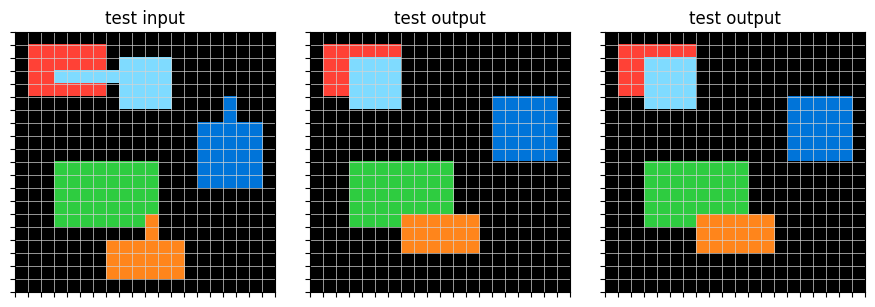

In [ ]:
plot_task_test(task, task_sol) # test_examples

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


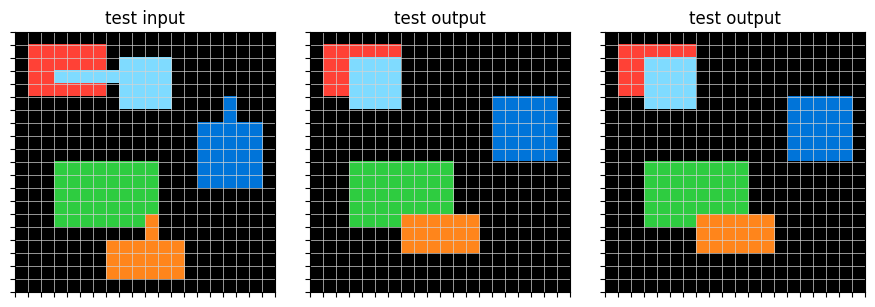

In [ ]:
def display_test_groundtruth(task_id, example_id):
    task = evaluation_challenges[task_id]
    task_sol = evaluation_solutions[task_id]
    n_train_pairs = len(task['train'])
    n_test_pairs = len(task['test'])
    print(f'task contains {n_train_pairs} training pairs')
    print(f'task contains {n_test_pairs} test pairs')
    print(f"number of test examples = {len(task_sol)}")
    test_input = task['test'][example_id]['input']
    test_output = task_sol[example_id]
    plot_task_test(task, task_sol) # test_examples
    return test_input, test_output

test_input, test_output = display_test_groundtruth('c6e1b8da', 0)

### Deal with Predicted results

#### Visualize submission

Need to load environment and dataset

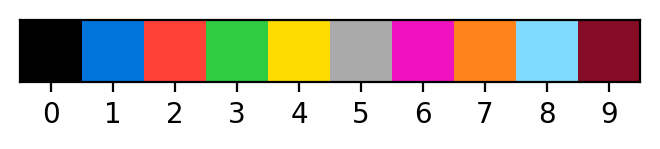

In [ ]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_one_test_pred(examples_attempts, ax, i, attempt_idx):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)

    input_matrix = examples_attempts[i][f"attempt_{attempt_idx+1}"]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)

    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(f'attempt {attempt_idx+1}: predicted test output')

def plot_task_test_pred(task, examples_attempts):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    num_test = len(task['test'])
    if num_test == 1:
        fig, axs = plt.subplots(num_test, 3, figsize=(3*3,3*num_test))
        plot_one(task, axs[0],0,'test','input')
        plot_one_test_pred(examples_attempts, axs[1], 0, 0)
        plot_one_test_pred(examples_attempts, axs[2], 0, 1)
    else:
        fig, axs = plt.subplots(num_test, 3, figsize=(3*3,3*num_test))
        for i in range(num_test):
            plot_one(task, axs[i,0],i,'test','input')
            plot_one_test_pred(examples_attempts, axs[i,1], i, 0)
            plot_one_test_pred(examples_attempts, axs[i,2], i, 1)
    plt.tight_layout()
    plt.show()

##### kaggle top1 result

task_id = 52fd389e


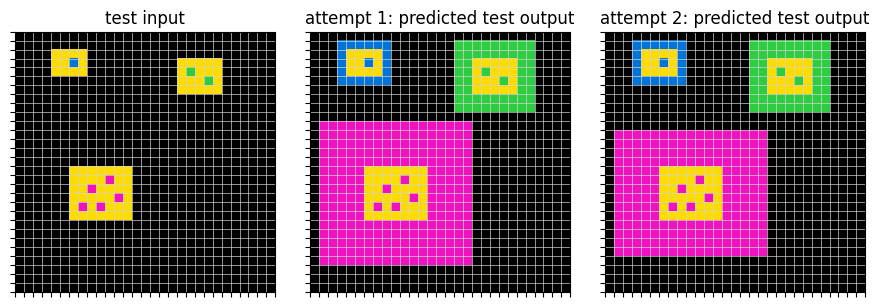

In [ ]:
# task_ids = ['c6e1b8da', '0d87d2a6', 'b457fec5']
task_ids1 = ['891232d6','52fd389e']
task_ids2 = ['a3f84088', 'b457fec5', 'f3b10344']
i = 1
task_id = task_ids1[i]
task = evaluation_challenges[task_id]
submission_file = f"/content/drive/MyDrive/MARC/Results/special_example_results_kaggle_t1/T1_submission1.json"
with open(submission_file, 'r') as file:
    submission = json.load(file)
print(f'task_id = {task_id}')
plot_task_test_pred(task, submission[task_id])

In [ ]:
print(f'task_id = {task_id}')
test_input, test_output = display_test_groundtruth(task_id, 0)

task_id = 52fd389e
task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


In [ ]:
np.array(submission[task_id][0]['attempt_1']).shape

(29, 29)

In [ ]:
np.array(test_output).shape

(29, 29)

In [ ]:
(np.array(submission[task_id][0]['attempt_1']) == np.array(test_output)).all()

True

In [ ]:
(np.array(submission[task_id][0]['attempt_2']) == np.array(test_output)).all()

False

##### barc-marc result

In [ ]:
task_ids = high_unsolved_taskids
task_id = '8b28cd80'
task = evaluation_challenges[task_id]
run_idx = 0
submission_file = f"/content/drive/MyDrive/MARC/Results/special_example_results_marc_barc/run{run_idx+1}/{task_id}/submission.json"
with open(submission_file, 'r') as file:
    submission = json.load(file)
print(f'Run {run_idx+1}: task_id = {task_id}')
plot_task_test_pred(task, submission[task_id])

Run 1: task_id = 8b28cd80


In [ ]:
print(f'task_id = {task_id}')
test_input, test_output = display_test_groundtruth(task_id, 0)

task_id = e681b708
task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


In [ ]:
(np.array(submission[task_id][0]['attempt_1']) == np.array(test_output)).all()

False

In [ ]:
(np.array(submission[task_id][0]['attempt_2']) == np.array(test_output)).all()

False

##### marc result 2

In [ ]:
#[1,7]

In [ ]:
task_ids = high_unsolved_taskids
task_id = task_ids[7]
task = evaluation_challenges[task_id]
run_idx = 0
submission_file = f"/content/drive/MyDrive/MARC/Results/special_example_results_marc/run{run_idx+1}/{task_id}/submission.json"
with open(submission_file, 'r') as file:
    submission = json.load(file)
print(f'Run {run_idx+1}: task_id = {task_id}')
plot_task_test_pred(task, submission[task_id])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MARC/Results/special_example_results_marc/run1/47996f11/submission.json'

task_id = d94c3b52
task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


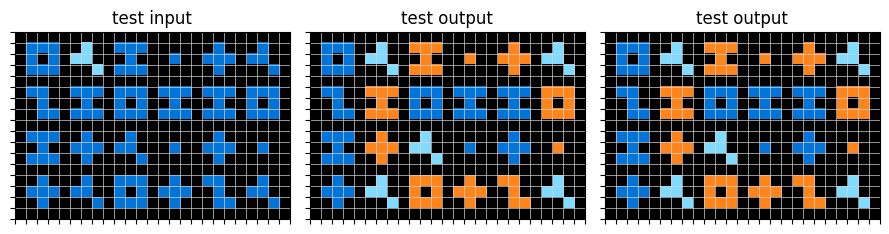

In [ ]:
print(f'task_id = {task_id}')
test_input, test_output = display_test_groundtruth(task_id, 0)

In [ ]:
(np.array(submission[task_id][0]['attempt_1']) == np.array(test_output)).all()

False

In [ ]:
(np.array(submission[task_id][0]['attempt_2']) == np.array(test_output)).all()

False

##### marc result 1

Comment: only **b457fec5** can be solved through marc

In [ ]:
submission_file1 = f"/content/drive/MyDrive/MARC/Results/combined_submission.json"
submission_file2 = '/content/drive/MyDrive/MARC/Results/special_example_results_marc/o3_high_unsolved_tasks/run1/submission.json'
with open(submission_file1, 'r') as file:
    submission1 = json.load(file)
with open(submission_file2, 'r') as file:
    submission2 = json.load(file)

In [ ]:
['f3b10344', 'a3f84088']

task_id = da515329
Run 1


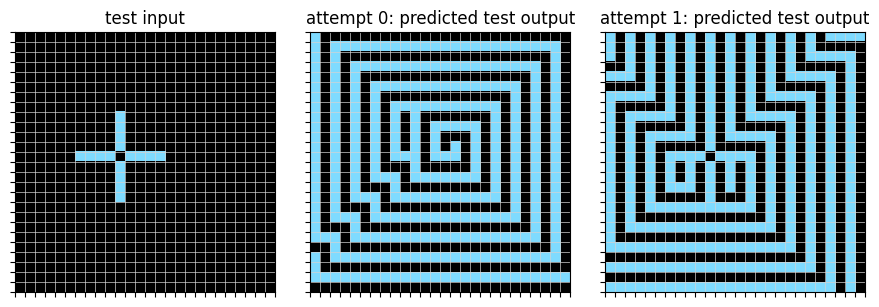

Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


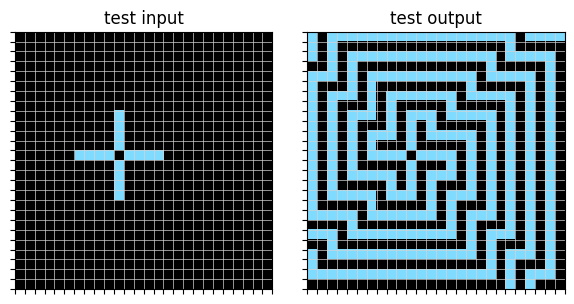

task_id = f9d67f8b
Run 1


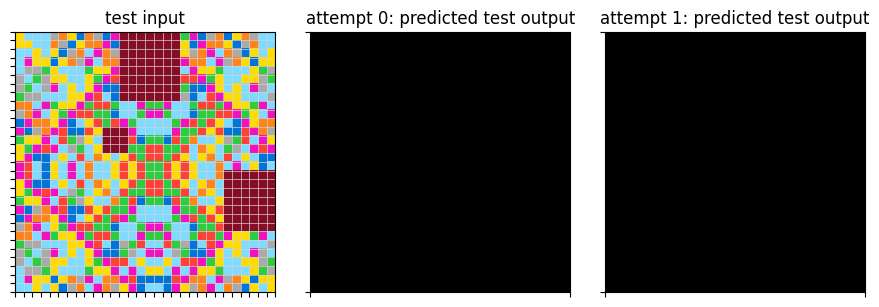

Run 2


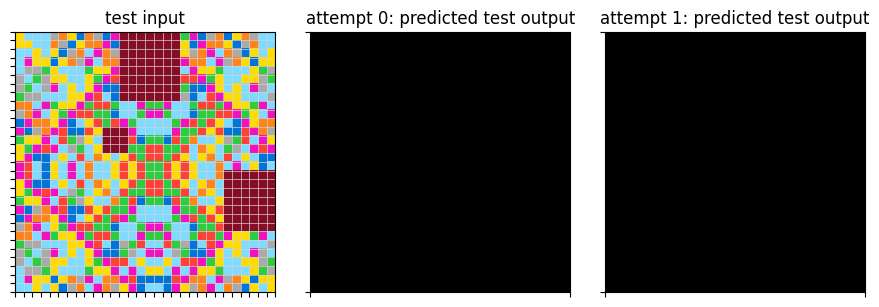

task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


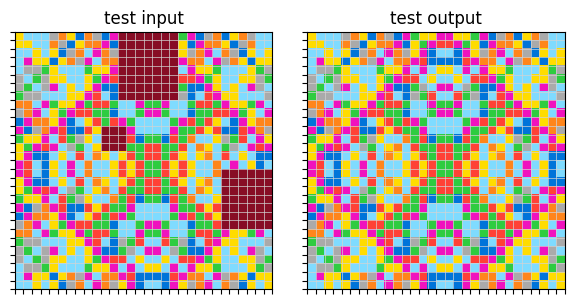

task_id = 891232d6
Run 1


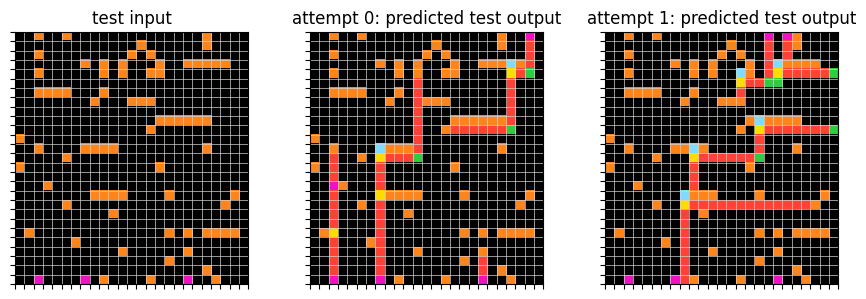

Run 2


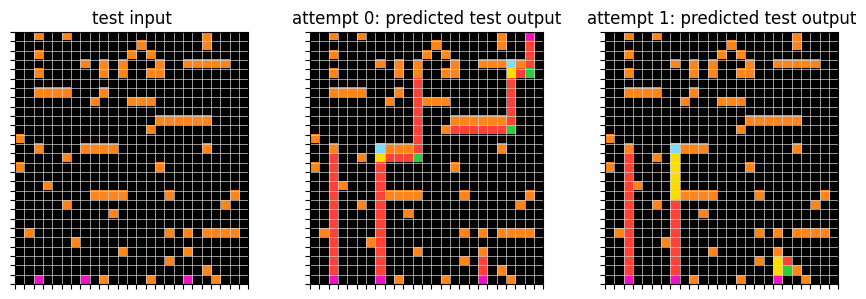

task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


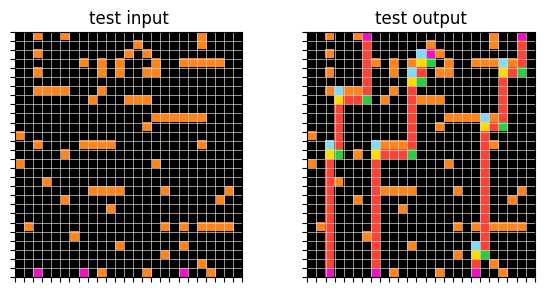

task_id = 52fd389e
Run 1


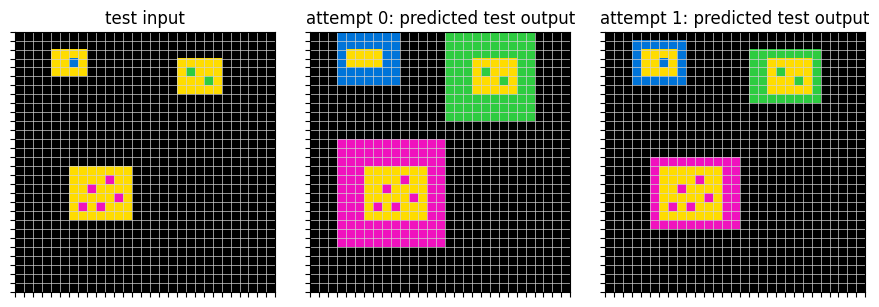

Run 2


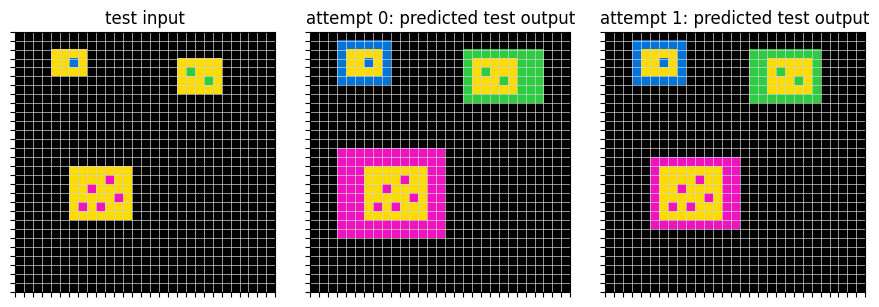

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


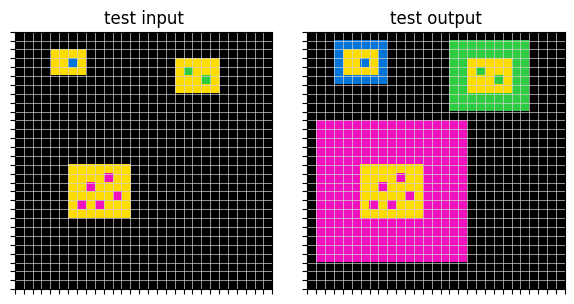

task_id = c6e1b8da
Run 1


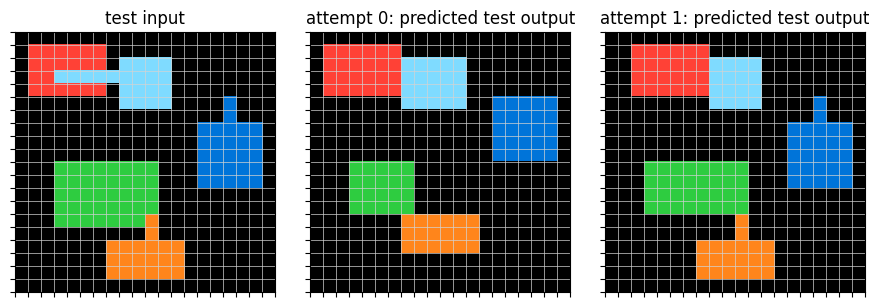

Run 2


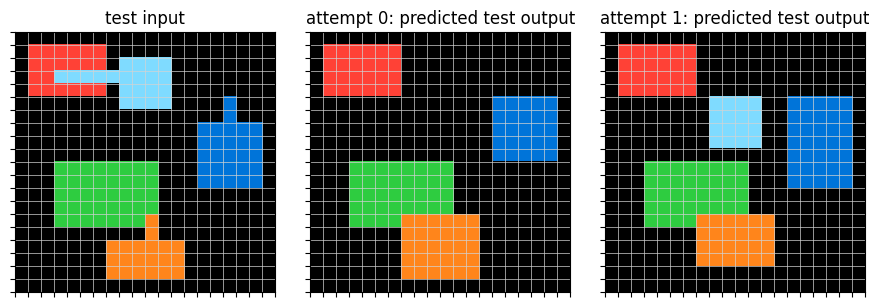

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


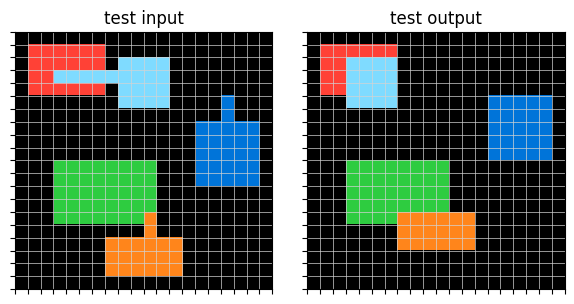

task_id = 09c534e7
Run 1


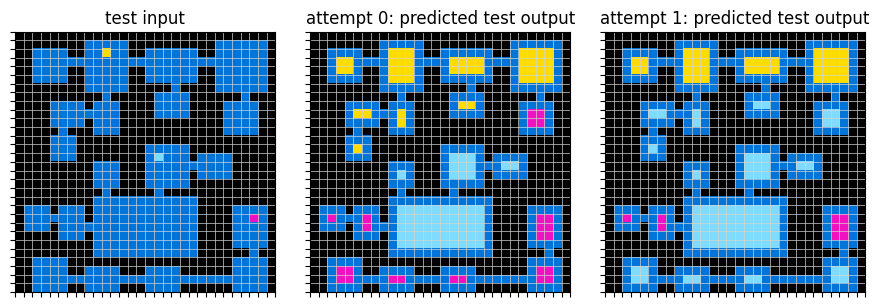

Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


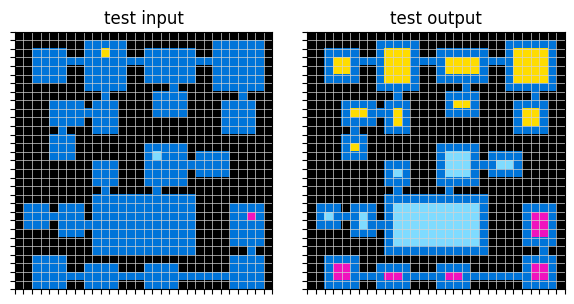

task_id = ac0c5833
Run 1


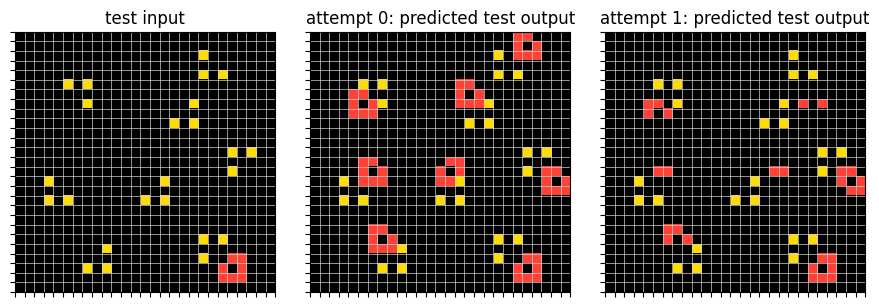

Run 2


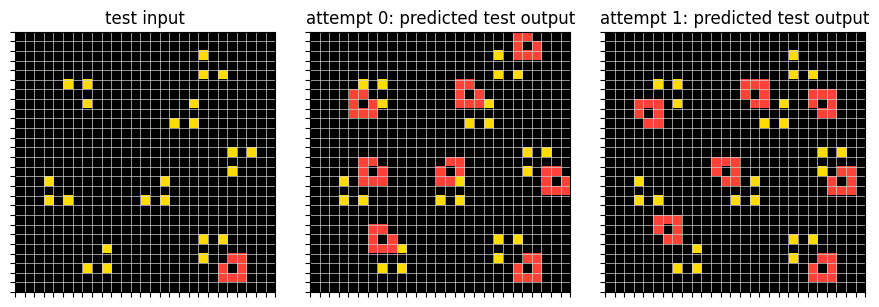

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = 47996f11
Run 1


Run 2


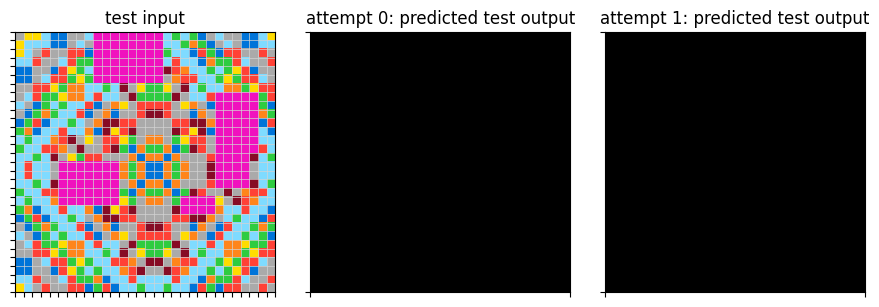

task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


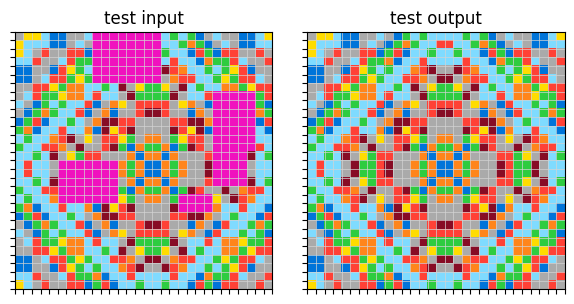

task_id = b457fec5
Run 1


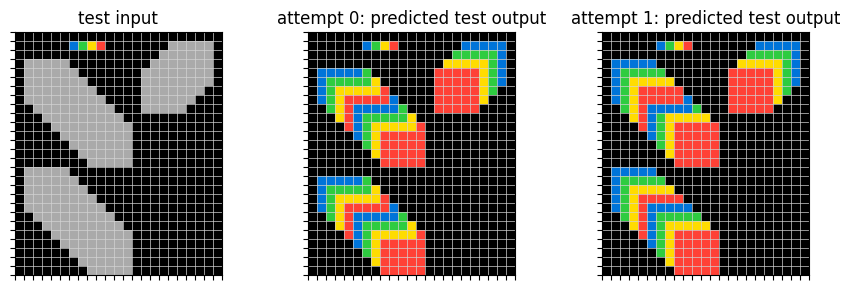

Run 2


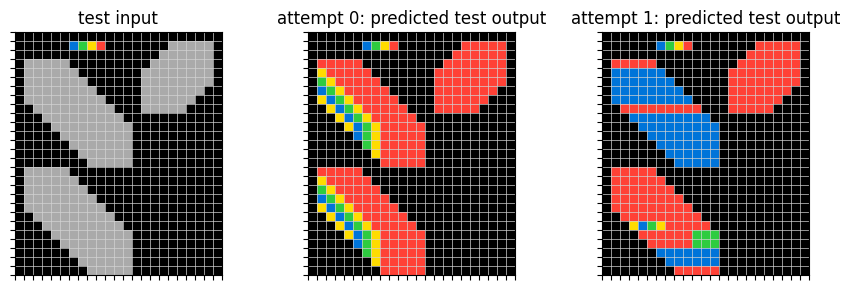

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


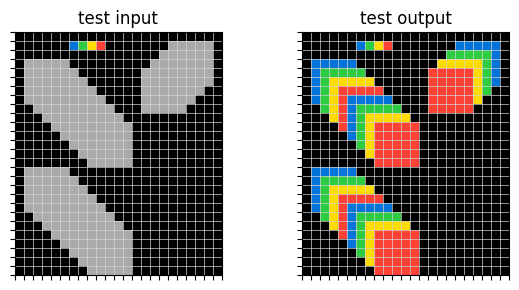

task_id = b7999b51
Run 1


Run 2


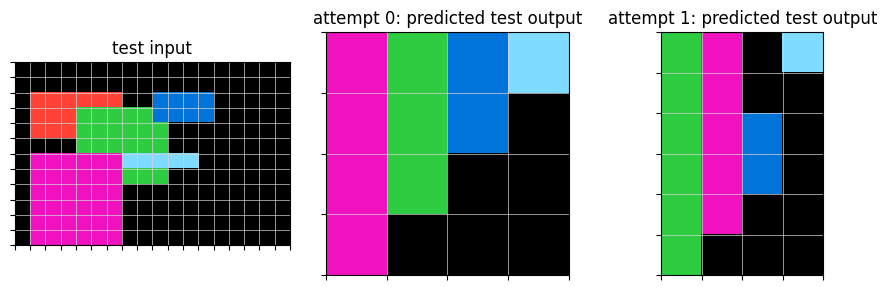

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


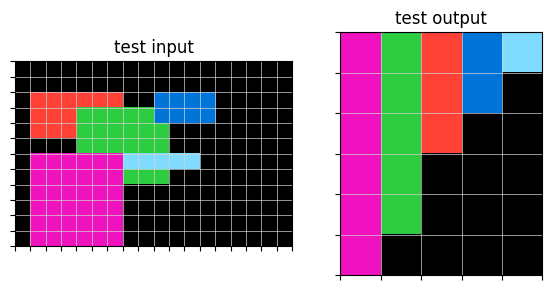

task_id = b9630600
Run 1


Run 2


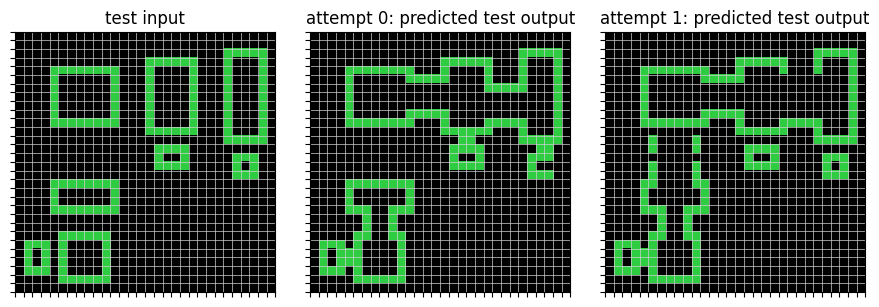

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = 896d5239
Run 1


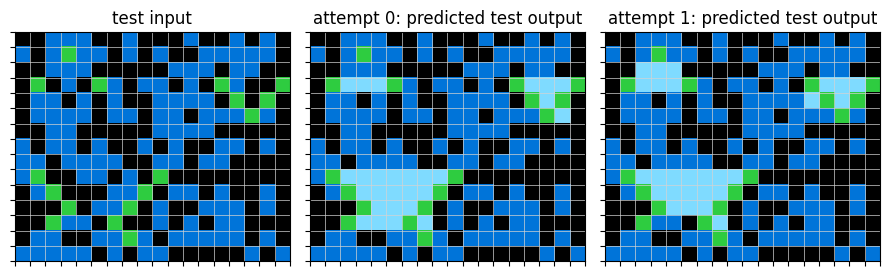

Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = 40f6cd08
Run 1


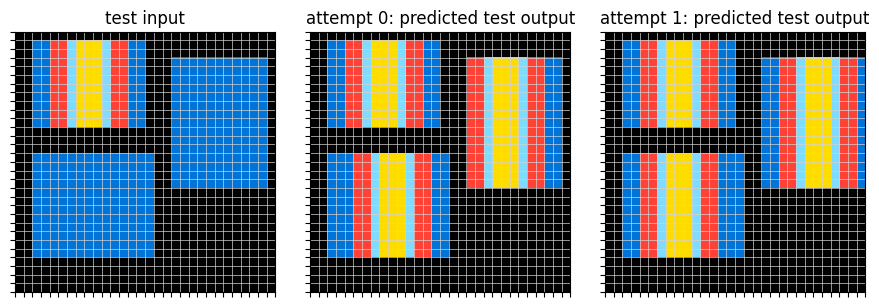

Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = 8b28cd80
Run 1
task_id = 8b28cd80 does not exist
task_id = 93c31fbe
Run 1


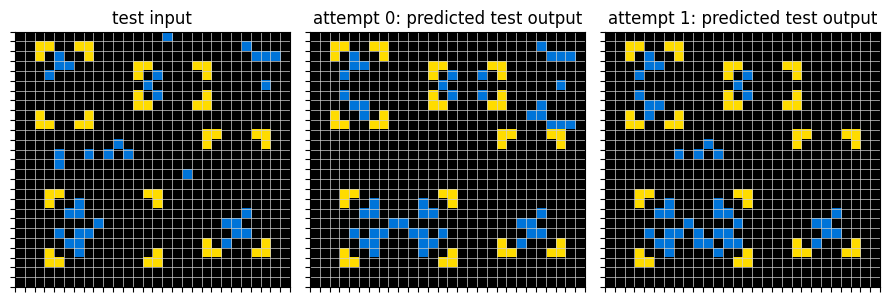

Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


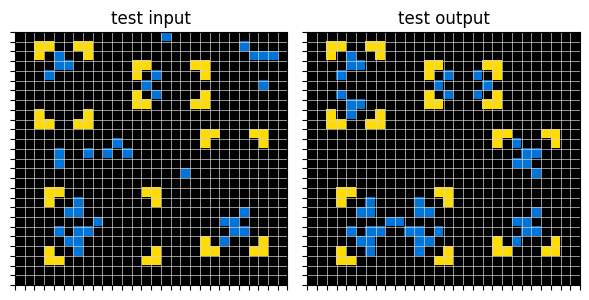

task_id = 25094a63
Run 1


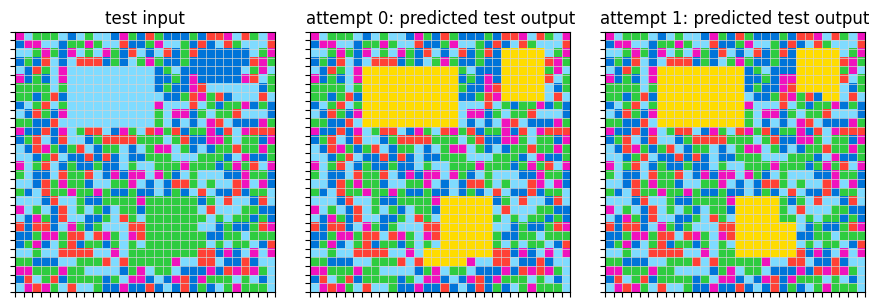

Run 2


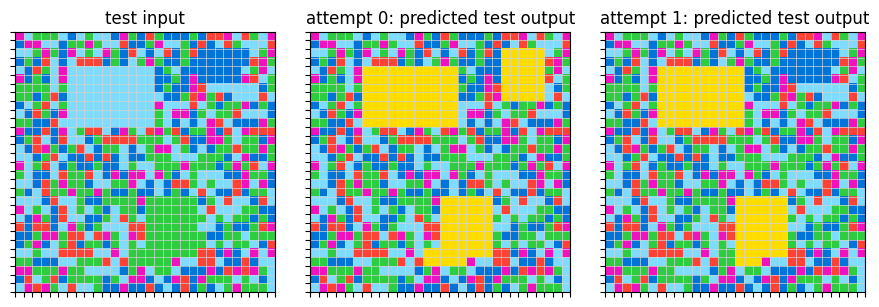

task contains 2 training pairs
task contains 1 test pairs
number of test examples = 1


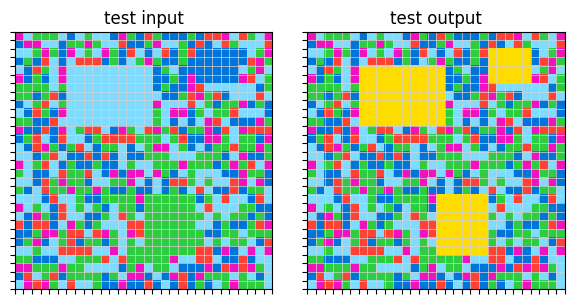

task_id = 05a7bcf2
Run 1


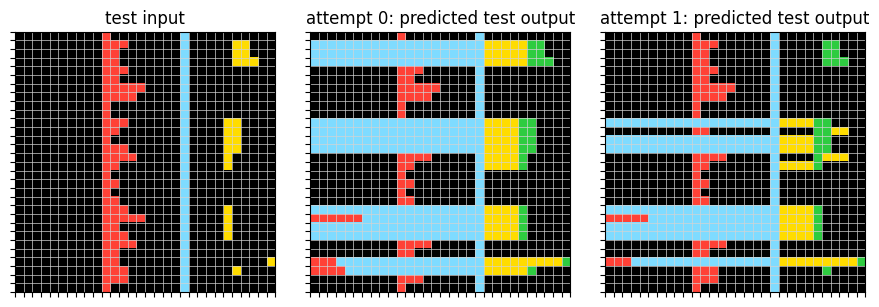

Run 2


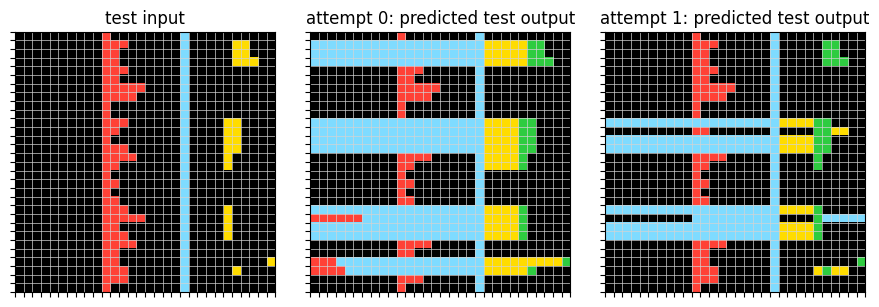

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


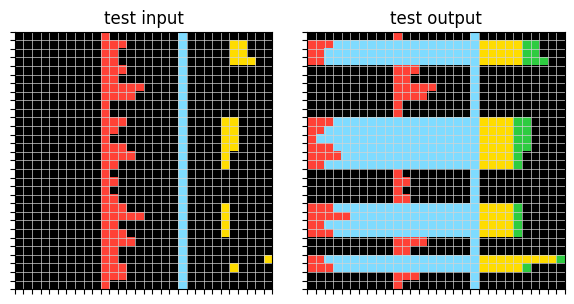

task_id = 0934a4d8
Run 1


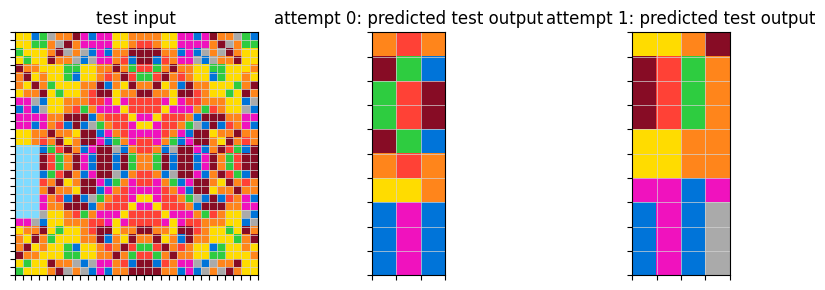

Run 2


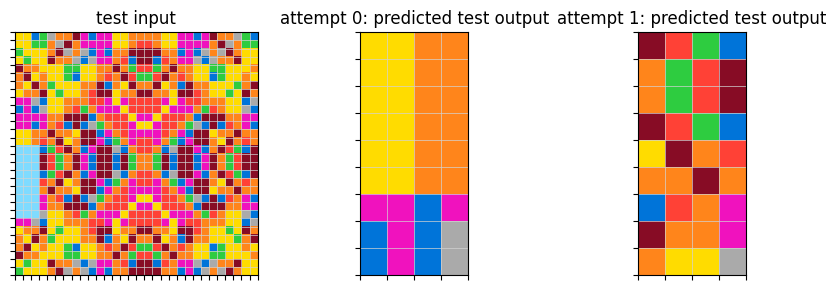

task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = 79fb03f4
Run 1


Run 2


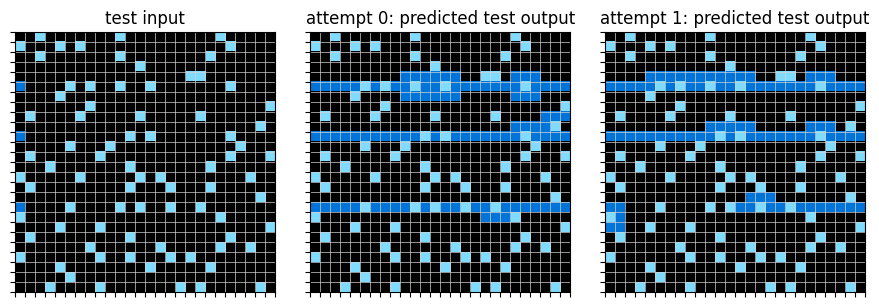

task contains 6 training pairs
task contains 1 test pairs
number of test examples = 1


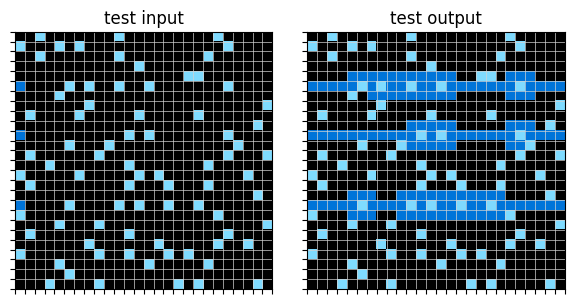

task_id = 4b6b68e5
Run 1


Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = aa4ec2a5
Run 1


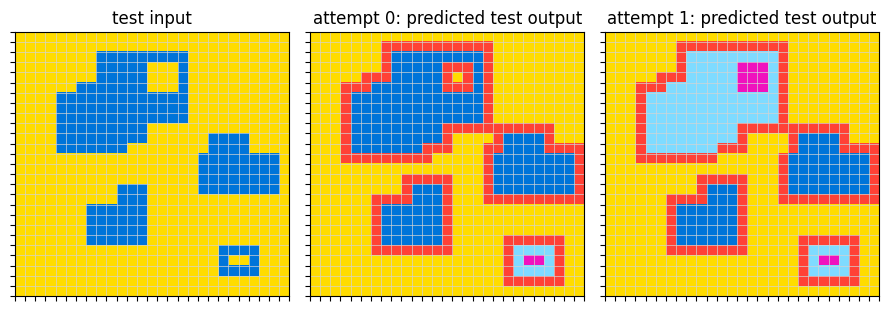

Run 2


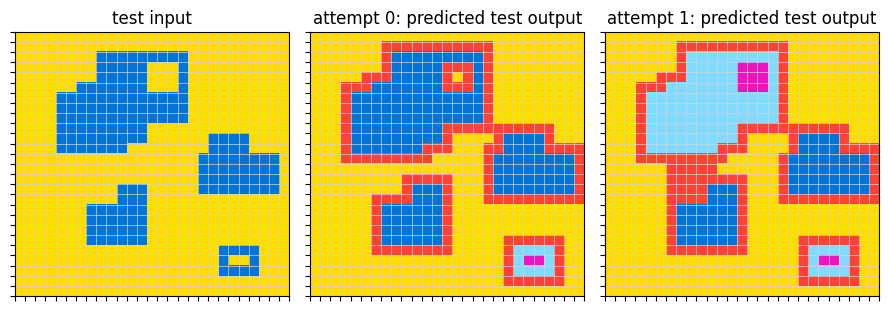

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


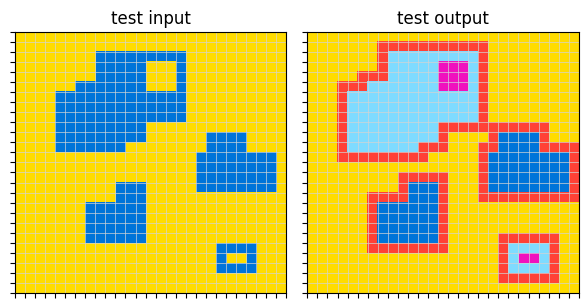

task_id = 1acc24af
Run 1


Run 2


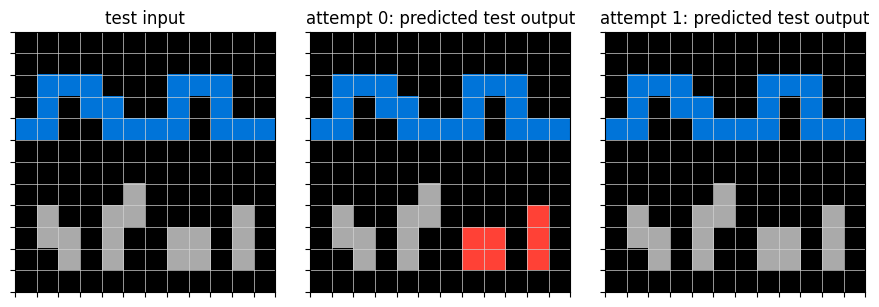

task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


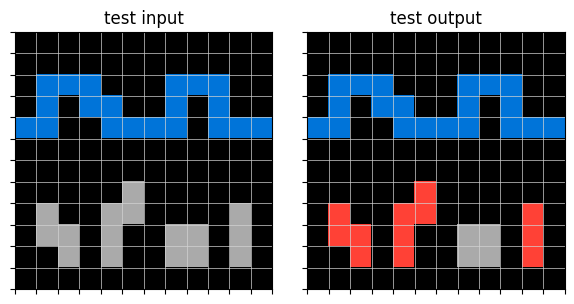

task_id = f3b10344
Run 1


Run 2


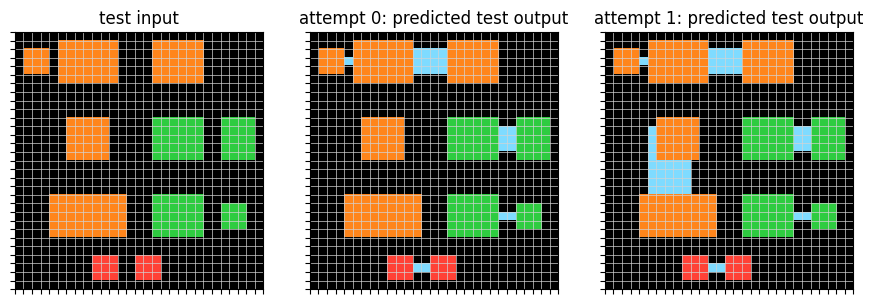

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


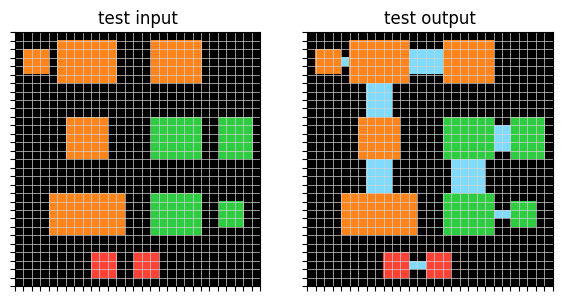

task_id = 256b0a75
Run 1


Run 2


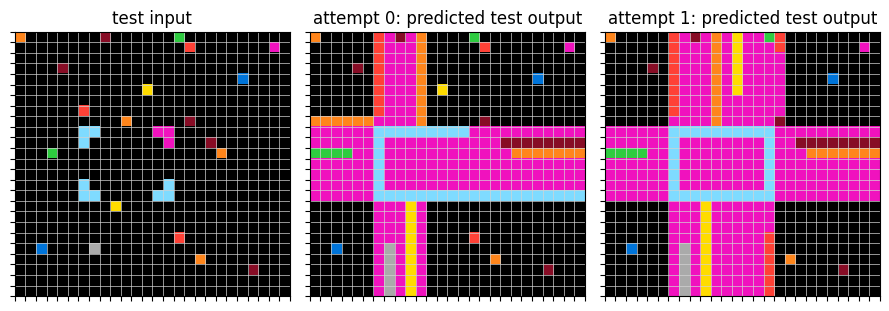

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = d931c21c
Run 1


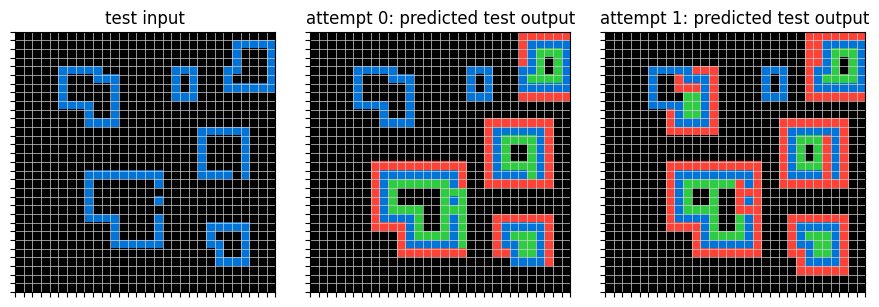

Run 2


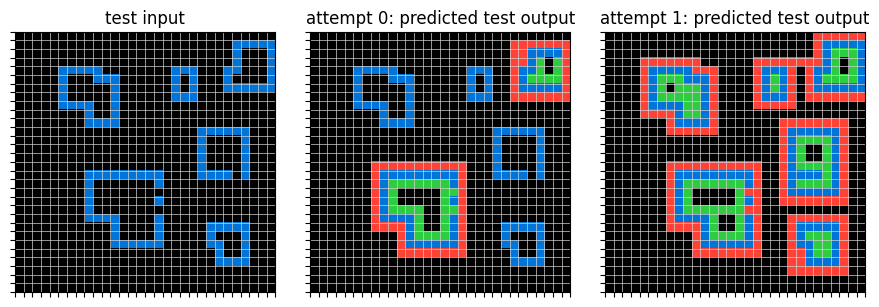

task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = 16b78196
Run 1


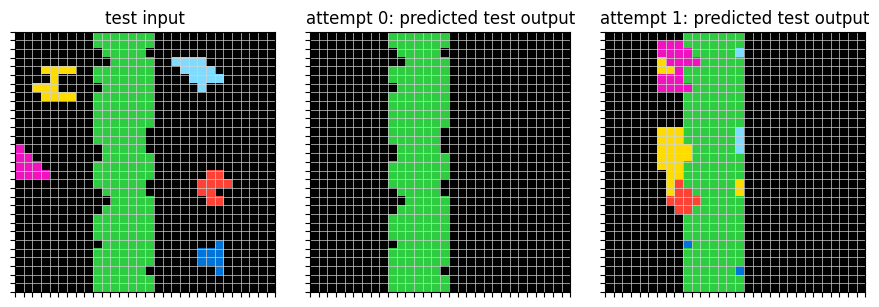

Run 2


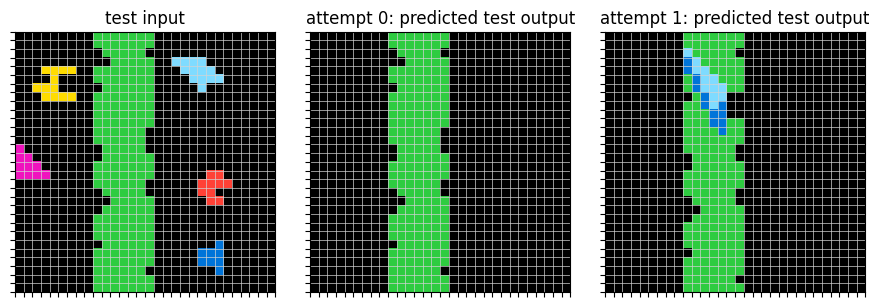

task contains 2 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = a3f84088
Run 1


Run 2


task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


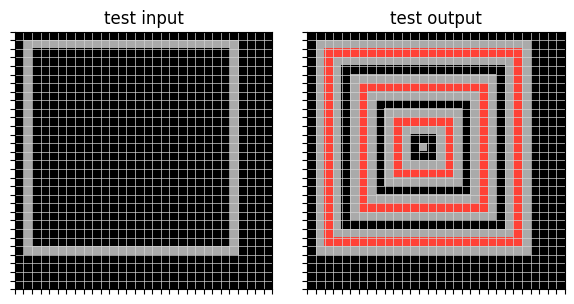

task_id = 212895b5
Run 1


Run 2


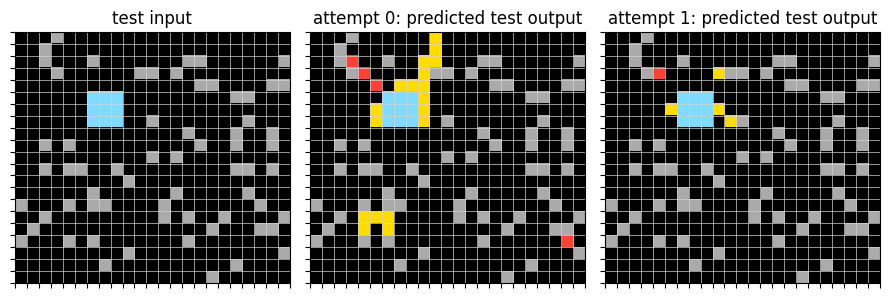

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


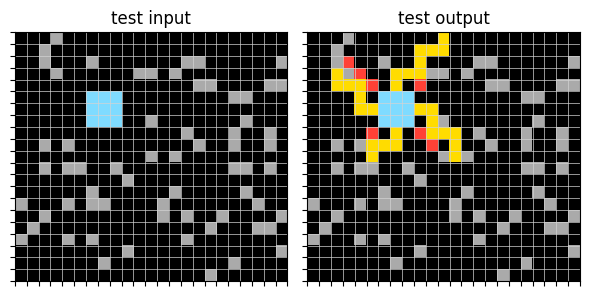

task_id = 0d87d2a6
Run 1


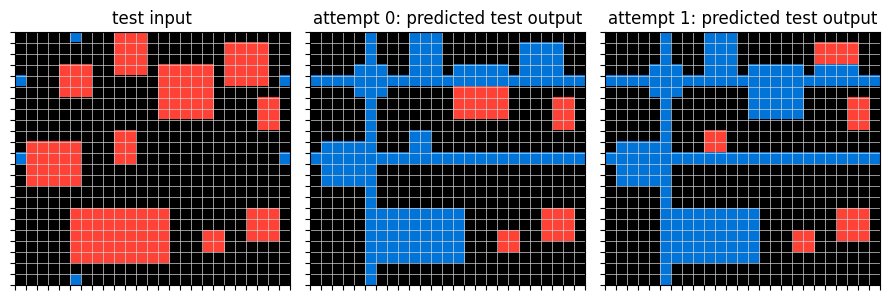

Run 2


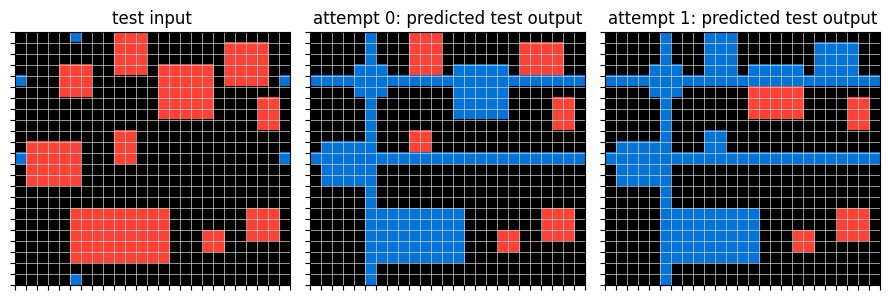

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = 3ed85e70
Run 1


Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


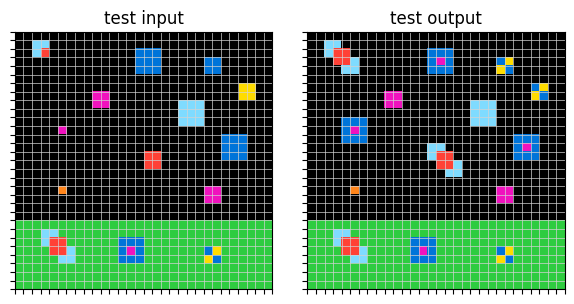

task_id = e619ca6e
Run 1


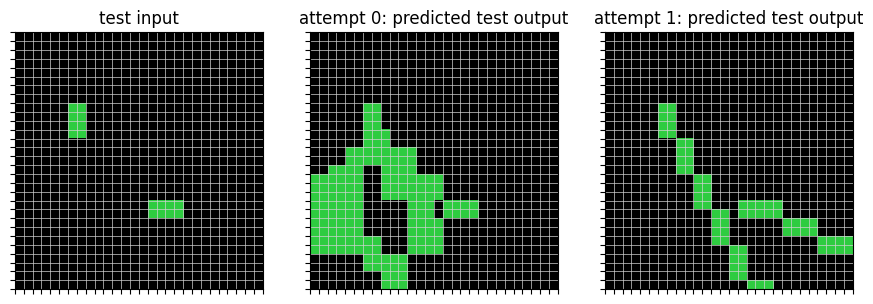

Run 2


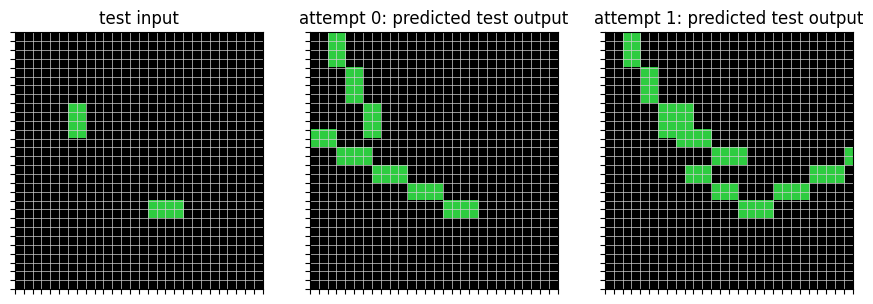

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


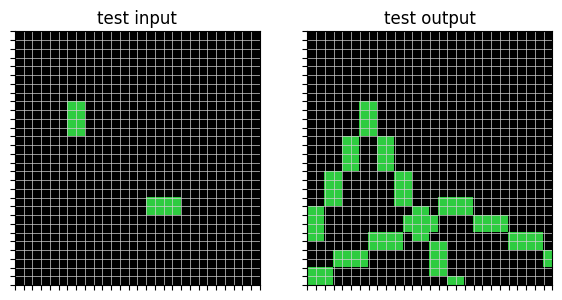

task_id = e1d2900e
Run 1


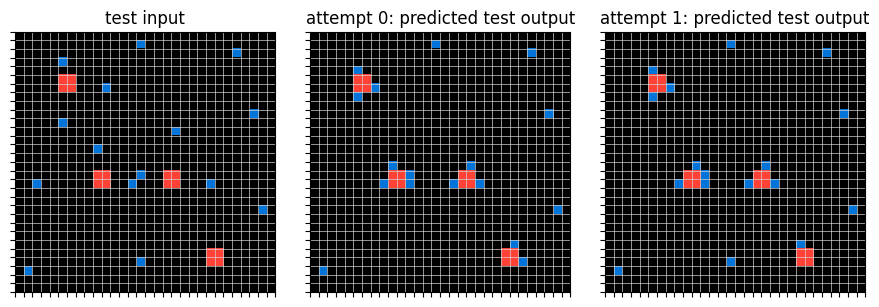

Run 2


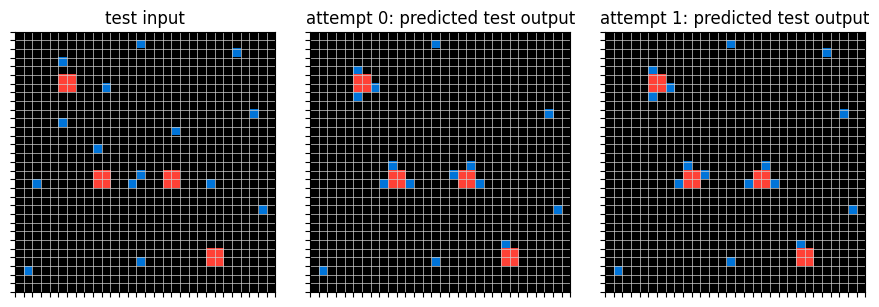

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


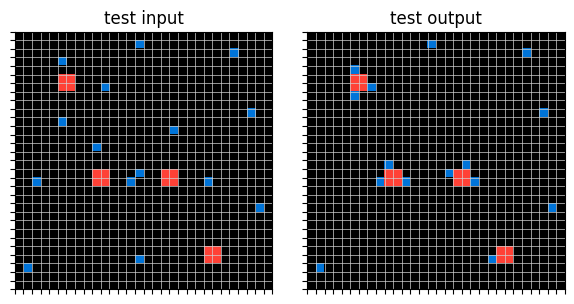

task_id = d94c3b52
Run 1


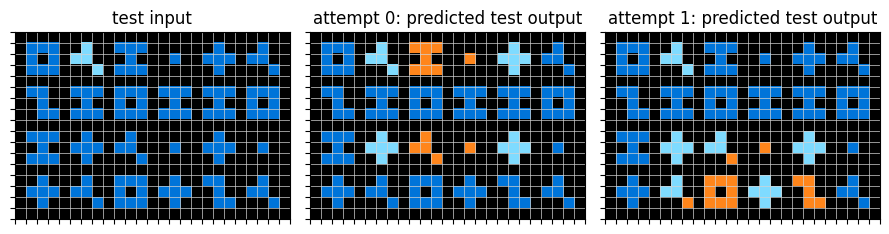

Run 2


task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


task_id = e681b708
Run 1


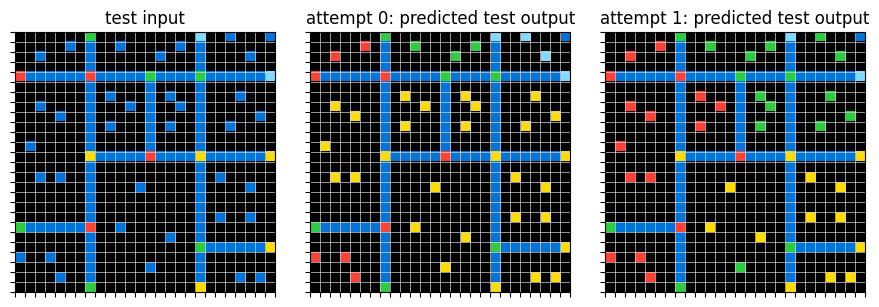

Run 2


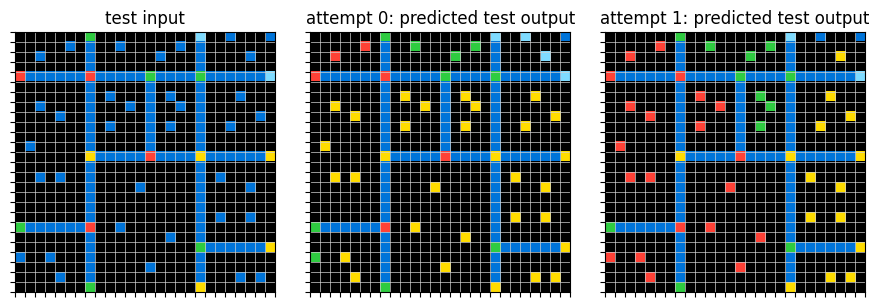

task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


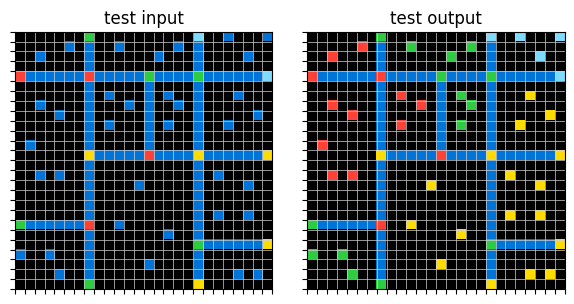

In [ ]:
for task_id in high_unsolved_taskids:
  try:
    task = evaluation_challenges[task_id]
    print(f'task_id = {task_id}')
    print(f"Run 1")
    plot_task_test_pred(task, submission1[task_id])
    print(f"Run 2")
    plot_task_test_pred(task, submission2[task_id])
    test_input, test_output = display_test_groundtruth(task_id, 0)
  except:
    print(f'task_id = {task_id} does not exist')

Run 1: task_id = b457fec5


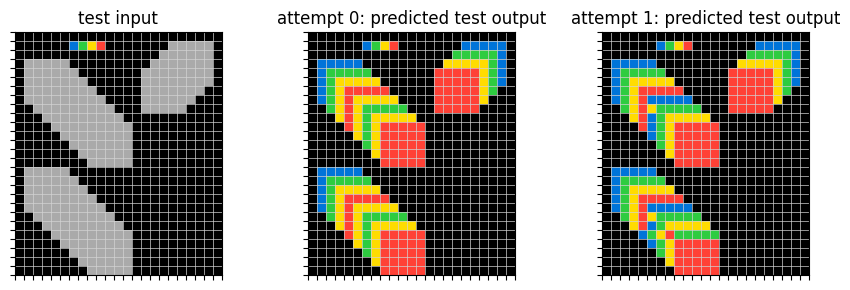

Run 2: task_id = b457fec5


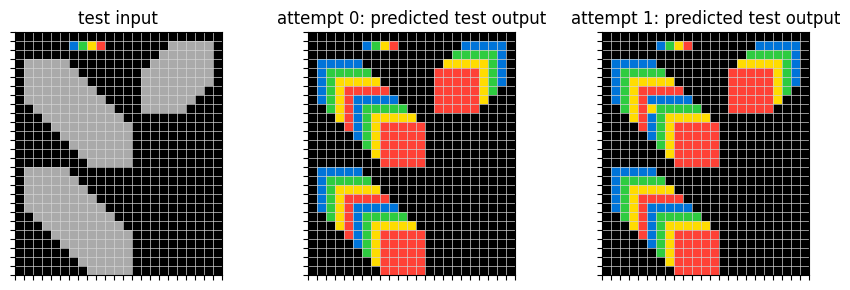

Run 3: task_id = b457fec5


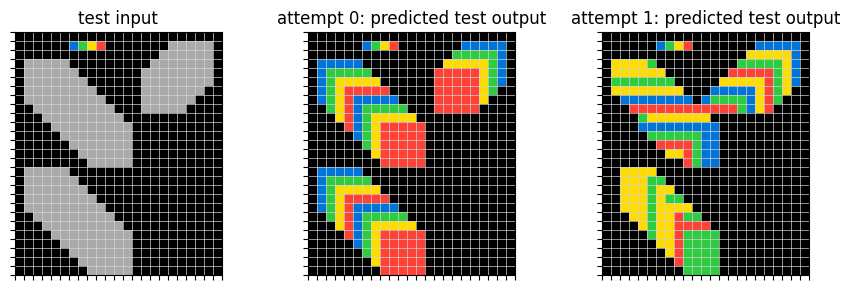

Run 4: task_id = b457fec5


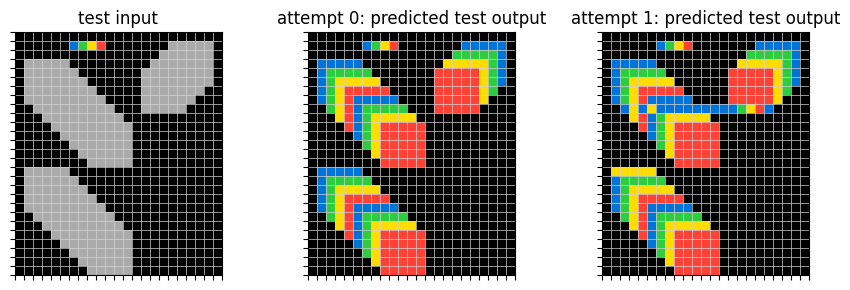

Run 5: task_id = b457fec5


In [ ]:
task_ids = ['c6e1b8da', '0d87d2a6', 'b457fec5']
task_id = task_ids[2]
task = evaluation_challenges[task_id]
for run_idx in range(5):
  submission_file = f"/content/drive/MyDrive/MARC/Results/special_example_results_marc/run{run_idx+1}/submission.json"
  with open(submission_file, 'r') as file:
      submission = json.load(file)
  print(f'Run {run_idx+1}: task_id = {task_id}')
  plot_task_test_pred(task, submission[task_id])

task_id = 0d87d2a6
task contains 3 training pairs
task contains 1 test pairs
number of test examples = 1


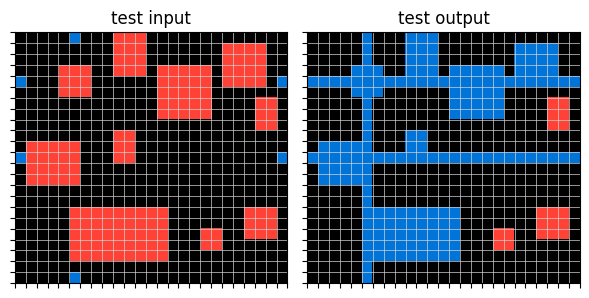

In [ ]:
print(f'task_id = {task_id}')
test_input, test_output = display_test_groundtruth(task_id, 0)

##### o1-mini result

In [ ]:
task_ids = ['c6e1b8da', '0d87d2a6', 'b457fec5', 'da515329', '891232d6']
task_id = task_ids[-1]
task = evaluation_challenges[task_id]
submission_file = f"/content/drive/MyDrive/MARC/Results/special_example_results_o1_mini/{task_id}/submission.json"
with open(submission_file, 'r') as file:
    submission = json.load(file)
print(f'task_id = {task_id}')
plot_task_test_pred(task, submission[task_id])

task_id = 891232d6


task_id = 891232d6
task contains 4 training pairs
task contains 1 test pairs
number of test examples = 1


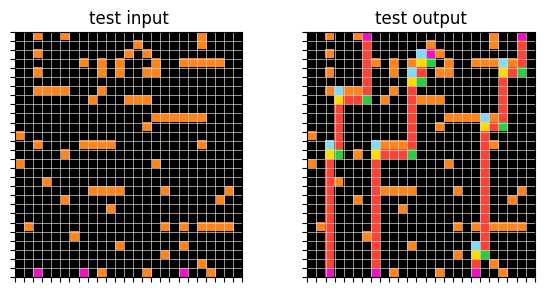

In [ ]:
print(f'task_id = {task_id}')
test_input, test_output = display_test_groundtruth(task_id, 0)

##### evaluate submission

In [ ]:
%cd /content/marc
from arclib.eval import evaluate
evaluate(data_file, solution_file, submission_file)

#### Convert Predicted result to submission

In [ ]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_one_test_pred(examples_attempts, ax, i, attempt_idx):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)

    input_matrix = examples_attempts[i][f"attempt_{attempt_idx+1}"]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)

    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(f'attempt {attempt_idx}: predicted test output')

def plot_task_test_pred(task, examples_attempts):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    num_test = len(task['test'])
    if num_test == 1:
        fig, axs = plt.subplots(num_test, 2, figsize=(3*2,3*num_test))
        plot_one_test_pred(examples_attempts, axs[0], 0, 0)
        plot_one_test_pred(examples_attempts, axs[1], 0, 1)
    else:
        fig, axs = plt.subplots(num_test, 2, figsize=(3*2,3*num_test))
        for i in range(num_test):
            plot_one_test_pred(examples_attempts, axs[i,0], i, 0)
            plot_one_test_pred(examples_attempts, axs[i,1], i, 1)
    plt.tight_layout()
    plt.show()

In [ ]:
import re

def convert_matrix_string(input_string):
    """
    Extract the last matrix from the input string and append '#'.
    Handles multiple matrices or descriptive text.
    """
    # Updated regular expression to correctly handle Python code blocks with matrices
    matches = re.findall(r"\[\s*\[.*?\]\s*\]", input_string, re.DOTALL)
    if matches:
        # Get the last matrix
        last_matrix = matches[-1]
        # Append '#' to the last matrix and return it in a list
        return [last_matrix + "#"]
    else:
        raise ValueError("No matrix content found in the input string")

# Calculate pricing
pricing_rates = {
    'o1-mini': {'input': 3.00, 'output': 12.00},
    'gpt-4o': {'input': 5.00, 'output': 15.00},
    'gpt-3.5-turbo': {'input': 1.50, 'output': 2.00},
    # Add other models and their rates as needed
}

def calculate_pricing(pricing_rates, model_name, usage):
  # Obtain usage
  # usage = dict(dict(completion).get('usage'))
  prompt_tokens = usage['prompt_tokens']
  completion_tokens = usage['completion_tokens']
  total_tokens = usage['total_tokens']

  # Calculate costs
  model_rates = pricing_rates[model_name]
  input_cost = (prompt_tokens / 1_000_000) * model_rates['input']
  output_cost = (completion_tokens / 1_000_000) * model_rates['output']
  total_cost = input_cost + output_cost

  print(f"Input Cost: ${input_cost:.6f}")
  print(f"Output Cost: ${output_cost:.6f}")
  print(f"Total Cost: ${total_cost:.6f}")

In [ ]:
import json
from collections import OrderedDict

In [ ]:
file_path = "/content/drive/MyDrive/MARC/Results/o1-mini_results_special.json"
with open(file_path, 'r') as file:
    data = json.load(file)

In [ ]:
len(data)

30

Select index

In [ ]:
idx_list = [data[i]['idx'] for i in range(len(data))]
task_ids = list(OrderedDict.fromkeys([idx.split("-")[0] for idx in idx_list])) # use ordereddict instead of set we can keep the order of appearance of task idx
task_ids

['c6e1b8da', '0d87d2a6', 'b457fec5']

In [ ]:
# You can select task_ids (Optional)
task_ids = ['c6e1b8da']

In [ ]:
inputs_by_key = {}
outputs_by_key = {}
for i in range(len(data)):
  idx = data[i]['idx']
  if idx.split("-")[0] in task_ids:
    prompt = data[i]['prompt']
    completion = data[i]['completion_data']
    gpt_response = completion['choices'][0]['message']['content']
    inputs_by_key[idx] = prompt
    # outputs_by_key[idx] = gpt_response
    outputs_by_key[idx] = convert_matrix_string(gpt_response)

In [ ]:
outputs_by_key

{'c6e1b8da-0-0': ['[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n [0, 0, 0, 0, 0, 0, 0

For the voting to select two attempts we need formatted test_input saved.

#### For an example

In [ ]:
i = 1
idx = data[i]['idx']
prompt = data[i]['prompt']
completion = data[i]['completion_data']

In [ ]:
idx

'c6e1b8da-0-1'

In [ ]:
print(prompt)

<|start_header_id|>system<|end_header_id|>

Figure out the underlying transformation in the following examples and apply it to the test case. Here are some examples from this transformation, your answer must follow the format.
The input-output grids are provided as python arrays:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 6 6 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0]
 [0 6 6 6 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0]
 [0 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0]
 [0 0 0 0 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0]
 [0 0 0 0 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 8 8 8 8 8 8 8 8 8 8 2 2 2 2 0 0 0]
 [0 3 8 8 8 8 8 8 8 0 0 2 2 2 2 2 2 0 0 0]
 [0 3 3 3 3 3 0 0 0 0 0 2 2 2 2 2 2 0 0 0]
 [0 3 3 3 3 3 0 0 0 0 0 2 2 2 2 2 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 2 2 2

In [ ]:
completion.keys()

dict_keys(['id', 'choices', 'created', 'model', 'object', 'service_tier', 'system_fingerprint', 'usage'])

In [ ]:
usage_data = dict(dict(completion).get('usage'))
usage_data

{'completion_tokens': 8626,
 'prompt_tokens': 4314,
 'total_tokens': 12940,
 'completion_tokens_details': {'accepted_prediction_tokens': 0,
  'audio_tokens': 0,
  'reasoning_tokens': 7104,
  'rejected_prediction_tokens': 0},
 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}

In [ ]:
gpt_response = completion['choices'][0]['message']['content']
print(gpt_response)

Based on the provided examples, it appears that the transformation involves expanding each labeled region outward, effectively performing a morphological dilation. This means that each non-zero value in the input grid spreads to its adjacent cells (horizontally, vertically, and possibly diagonally), increasing the size of each labeled area.

Applying this transformation to your test case, the output grid after expansion would look like the following:

```python
[
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0,

### BARC Result

In [ ]:
from google.colab import userdata
import os
# Login for hugging face (For load models and lora adapaters)
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

In [ ]:
# prompt: download dataset from barc0/transduction_experimental_results from huggingface

!pip install huggingface_hub
from huggingface_hub import snapshot_download

snapshot_download(repo_id="barc0/transduction_experimental_results", local_dir="/content/transduction_experimental_results")
!ls /content/transduction_experimental_results

RepositoryNotFoundError: 404 Client Error. (Request ID: Root=1-6792d719-2cbcacdc0c2714c41639dd70;d7e2202a-a3c0-4c8a-b850-c237ac279a0e)

Repository Not Found for url: https://huggingface.co/api/models/barc0/transduction_experimental_results/revision/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.

In [ ]:
# Load LoRA (Example)
from huggingface_hub import snapshot_download
import time

start_time = time.time()
print("Start Time:", start_time)

# ... your code execution ...
snapshot_download(repo_id="barc0/transduction_experimental_results",
                  local_dir="/content/barc_results",
                  local_dir_use_symlinks=False)


end_time = time.time()
print("End Time:", end_time)
print("Total Time:", end_time - start_time)


Start Time: 1737676020.731032


RepositoryNotFoundError: 404 Client Error. (Request ID: Root=1-6792d4f4-195c60650ceef4184fb3bbf2;7df591ce-191a-4c04-9451-c579404bb138)

Repository Not Found for url: https://huggingface.co/api/models/barc0/transduction_experimental_results/revision/main.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.